<a href="https://colab.research.google.com/github/yaeliavni/Machine-Learning/blob/master/TomatoesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hey!
This is the project by Bat El Levy and Yael Avni.

We chose to use the data that was recommened to us from you - the proffessor.

The data is in general regarding agriculture and tomato yield with different features that we will analyze their relation and affect on the tomato yield that is our main focus.

Throughout the project we learnened a lot about the implementation of the different data analization and visualization that we learned in class.

We tried to also read further into the data and give some interesting perspectives.

In [ ]:
""" Here we are importing libraries that we will use in the rest of the code: we used 'pip install -- ' to install the general libraries and the sub libraries that come with them.
The libraries we installed and are not sure we went over them in class we will explain further how we installed them here:
then we are uploading the data from our computer as a csv file (data seperated by comma) and reading it with the pandas library."""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor


dataset_file_path = "/content/tomatoes.csv"
df = pd.read_csv(dataset_file_path)

*General* statistics about the data

In [ ]:
""" Here we are extracting the general statistics about the data, obviously id column isn't relevant here but we decided it doesn't bother us. We can see here some general statistical functions
regarding each column in the data, it gives us a general feeling about our data and we can for sure already see some outliers we will fix later (min value in the max upper bloom temp etc.)
The general statistics here show that many of the data is either integers type or float type, we can observe the general statistics of the mean, standard deviation, quarters of the data and minimun and maximum."""

df.describe()


id  Average Plant Size  Bee_1 Pollination Activity  \
count  15289.000000        15289.000000                15289.000000   
mean    7644.000000           19.704690                    0.389314   
std     4413.698468            6.595211                    0.361643   
min        0.000000           10.000000                    0.000000   
25%     3822.000000           12.500000                    0.250000   
50%     7644.000000           25.000000                    0.500000   
75%    11466.000000           25.000000                    0.500000   
max    15288.000000           40.000000                   18.430000   

       bee_2 Pollination Activity  bee_3 Pollination Activity  \
count                15289.000000                15289.000000   
mean                     0.286768                    0.492675   
std                      0.059917                    0.148115   
min                      0.000000                    0.000000   
25%                      0.250000                    0.380000   
50%                      0.250000                    0.500000   
75%                      0.380000                    0.630000   
max                      0.585000                    0.750000   

       bee_4 Pollination Activity  Maximum Upper Bloom Temperature  \
count                15289.000000                     15289.000000   
mean                     0.592355                        82.147034   
std                      0.139489                         9.363749   
min                      0.000000                      -100.000000   
25%                      0.500000                        77.400000   
50%                      0.630000                        86.000000   
75%                      0.750000                        86.000000   
max                      0.750000                        94.600000   

       Minimum Upper Bloom Temperature  Maximum Lower Bloom Temperature  \
count                     15289.000000                     15289.000000   
mean                         49.673281                        59.229538   
std                           5.546405                         6.610640   
min                          39.000000                        50.200000   
25%                          46.800000                        55.800000   
50%                          52.000000                        62.000000   
75%                          52.000000                        62.000000   
max                          57.200000                        68.200000   

       Minimum Lower Bloom Temperature  Average Lower Bloom Temperature  \
count                     15289.000000                     15289.000000   
mean                         28.660553                        48.568500   
std                           3.195367                         5.390545   
min                          24.300000                        41.200000   
25%                          27.000000                        45.800000   
50%                          30.000000                        50.800000   
75%                          30.000000                        50.800000   
max                          33.000000                        55.900000   

       Total Rainy Days  Proportion of Rainy Days     fruit_set  \
count      15289.000000              15289.000000  15289.000000   
mean          18.660865                  0.324176      0.502741   
std           11.657582                  0.163905      0.074390   
min            1.000000                  0.060000      0.192732   
25%           16.000000                  0.260000      0.458246   
50%           16.000000                  0.260000      0.506600   
75%           24.000000                  0.390000      0.560445   
max           34.000000                  0.560000      0.652144   

       mass_of_fruit  average_seeds  tomato_yield  
count   15289.000000   15289.000000  15289.000000  
mean        0.446553      36.164950   6025.193999  
std         0.037035       4.031087   1337.05685

General information about our data, such as data types:



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               15289 non-null  int64  
 1   Average Plant Size               15289 non-null  float64
 2   Bee_1 Pollination Activity       15289 non-null  float64
 3   bee_2 Pollination Activity       15289 non-null  float64
 4   bee_3 Pollination Activity       15289 non-null  float64
 5   bee_4 Pollination Activity       15289 non-null  float64
 6   Maximum Upper Bloom Temperature  15289 non-null  float64
 7   Minimum Upper Bloom Temperature  15289 non-null  float64
 8   Average Upper Bloom Temperature  15289 non-null  object 
 9   Maximum Lower Bloom Temperature  15289 non-null  float64
 10  Minimum Lower Bloom Temperature  15289 non-null  float64
 11  Average Lower Bloom Temperature  15289 non-null  float64
 12  Total Rainy Days  

Here we already notice that it recognizes one column as an object type, but clearly from seeing the data when we open it in excel we see it should be either float or integer, so we will further investigate into that.

In [ ]:
# counting unique values in our data per column
unique_counts = df.nunique()


display(unique_counts.to_frame(name="Unique Counts"))


Unique Counts
id                                       15289
Average Plant Size                           6
Bee_1 Pollination Activity                   7
bee_2 Pollination Activity                  11
bee_3 Pollination Activity                  16
bee_4 Pollination Activity                  14
Maximum Upper Bloom Temperature              8
Minimum Upper Bloom Temperature              5
Average Upper Bloom Temperature              6
Maximum Lower Bloom Temperature              6
Minimum Lower Bloom Temperature              7
Average Lower Bloom Temperature              5
Total Rainy Days                             6
Proportion of Rainy Days                     8
fruit_set                                 1525
mass_of_fruit                             1515
average_seeds                             2066
tomato_yield                               776

So now we can clearly distinguish between what we can make into categorical columns and what will be for sure numerical, of course we can draw the line (above 10 / 100 uniques is numerical) in several places but we agreed after some considiration and logic of the numerical columns to be: fruit_set, mass_of_fruit, average_seed and tomato_yield.

In [ ]:
# we are defining categorical & numerical columns after what we decided where to draw the line
categorical_columns = [
    "Average Plant Size",
    "Bee_1 Pollination Activity",
    "bee_2 Pollination Activity",
    "bee_3 Pollination Activity",
    "bee_4 Pollination Activity",
    "Maximum Upper Bloom Temperature",
    "Minimum Upper Bloom Temperature",
    "Average Upper Bloom Temperature",
    "Maximum Lower Bloom Temperature",
    "Minimum Lower Bloom Temperature",
    "Average Lower Bloom Temperature",
    "Total Rainy Days",
    "Proportion of Rainy Days",
]

numerical_columns = [
    "fruit_set",
    "mass_of_fruit",
    "average_seeds",
    "tomato_yield"
]

unique_identifier = "id"

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

for col in categorical_columns:
    df[col] = df[col].astype("category")

actual_categorical_columns = df.select_dtypes(include=["category"]).columns.tolist()
actual_numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical Columns:", actual_categorical_columns)
print("Numerical Columns:", actual_numerical_columns)


Categorical Columns: ['Average Plant Size', 'Bee_1 Pollination Activity', 'bee_2 Pollination Activity', 'bee_3 Pollination Activity', 'bee_4 Pollination Activity', 'Maximum Upper Bloom Temperature', 'Minimum Upper Bloom Temperature', 'Average Upper Bloom Temperature', 'Maximum Lower Bloom Temperature', 'Minimum Lower Bloom Temperature', 'Average Lower Bloom Temperature', 'Total Rainy Days', 'Proportion of Rainy Days']
Numerical Columns: ['id', 'fruit_set', 'mass_of_fruit', 'average_seeds', 'tomato_yield']


Third teen categorial and four numerical variables

Categorial distributions and exploring:

When we ran a normal check of the different data types for each column in the very beginning we ran into a problem, where a column that is clearly containing integers and floats was found to be of type object. Then we realized it is a classical case of combination of string in a numbers column - so we went and organized the data according to what was expected to be found in each column data type wise. Our idea was to take a row where we are sure the data types are correct as refrence and make sure what isn't of the same type as the refrence will be printed for us to see it

In [ ]:
# taking the second row (1st index) as a reference for data types
expected_types = {}

for col in df.columns:
    second_row_value = df[col].iloc[1]
    try:
        if "." in second_row_value or second_row_value.lower() in ["nan", "null"]:
            expected_types[col] = float
        else:
            expected_types[col] = int if second_row_value.isdigit() else str
    except Exception:
        expected_types[col] = str

print("\n=== Expected Data Types from Second Row ===")
for col, dtype in expected_types.items():
    print(f"{col}: {dtype.__name__}")

irregular_values = {}

for col, expected_type in expected_types.items():
    irregular_rows = []
    for i, value in enumerate(df[col]):
        try:
            if expected_type == float:
                float(value)
            elif expected_type == int:
                int(value)
        except (ValueError, TypeError):
            if i > 0:
                irregular_rows.append((i, value))

    if irregular_rows:
        irregular_values[col] = irregular_rows

print("\n=== Irregular Values That Don't Match Expected Types ===")
if irregular_values:
    for col, issues in irregular_values.items():
        print(f"Column '{col}' has unexpected values at rows:")
        for row, val in issues[:10]:  # how many examples per column to print
            print(f"  - Row {row + 1}: '{val}' (Expected {expected_types[col].__name__})")
else:
    print("No irregular values found.")

unique_values = {col: df[col].unique() for col in df.columns}

unique_values_df = pd.DataFrame(
    [(col, unique_values[col]) for col in unique_values],
    columns=["Column", "Unique Values"]
)
print("\n=== Unique Values in Each Column ===")
print(unique_values_df.to_string())



=== Expected Data Types from Second Row ===
id: str
Average Plant Size: str
Bee_1 Pollination Activity: str
bee_2 Pollination Activity: str
bee_3 Pollination Activity: str
bee_4 Pollination Activity: str
Maximum Upper Bloom Temperature: str
Minimum Upper Bloom Temperature: str
Average Upper Bloom Temperature: float
Maximum Lower Bloom Temperature: str
Minimum Lower Bloom Temperature: str
Average Lower Bloom Temperature: str
Total Rainy Days: str
Proportion of Rainy Days: str
fruit_set: str
mass_of_fruit: str
average_seeds: str
tomato_yield: str

=== Irregular Values That Don't Match Expected Types ===
Column 'Average Upper Bloom Temperature' has unexpected values at rows:
  - Row 1053: 'missing' (Expected float)
  - Row 3057: 'missing' (Expected float)
  - Row 3068: 'missing' (Expected float)
  - Row 4729: 'missing' (Expected float)
  - Row 4744: 'missing' (Expected float)

=== Unique Values in Each Column ===
                             Column                                        

clearly we can see when it says "missing" we have missing data in Average Upper Bloom Temperature data that won't appear as nan or null in isna (how we are used to find missing values) so we can do two things: either remove them, we can change them to be the median or the average of the column it is in, of course if we had words we couldn't have done the mean so we can choose the mode in that case - which is the most common of the shown category types.

for now we decided we it doesn't matter we have float and integer values in one column so we won't convert either but we will keep it in mind since it can cause confusion in the future handleing of the data.

Handle missing values: we know it is better to replace the missing values with the median that is better than the mean. We also know that if we have about 99% - and less of course, missing values we can throw away that column or row

the only thing we handled so far is changing the str 'missing' we had and changed it to the median, after exminning the percent of it out of the data we have, since it only appears several times we know it is okay to replace it with the median or mean and it won't change much of the variation of the data.

since we only counted 5 out of 15000 about we can replace them with the median or mean

In [ ]:
# replacing "missing" with the median of each column since some of the data is right or left skewed.
for col in df.columns:
    if df[col].dtype == object and "missing" in df[col].values:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)


print(df)
print("\n'Replacement of missing values with median completed.'")


          id Average Plant Size Bee_1 Pollination Activity  \
0          0               25.0                       0.50   
1          1               25.0                       0.50   
2          2               12.5                       0.25   
3          3               12.5                       0.25   
4          4               25.0                       0.50   
...      ...                ...                        ...   
15284  15284               12.5                       0.25   
15285  15285               12.5                       0.25   
15286  15286               25.0                       0.50   
15287  15287               25.0                       0.50   
15288  15288               25.0                       0.50   

      bee_2 Pollination Activity bee_3 Pollination Activity  \
0                           0.25                       0.75   
1                           0.25                       0.50   
2                           0.25                       0.63   
3  

In [ ]:
missing_counts = {}

for col in df.columns:
    if df[col].dtype == object:
        count = (df[col] == 'missing').sum()
        if count > 0:
            missing_counts[col] = count

print("\n=== Count of 'missing' Values in Each Column ===")
if missing_counts:
    for col, count in missing_counts.items():
        print(f"Column '{col}': {count} occurrences")
else:
    print("No 'missing' values found in the dataset.")


=== Count of 'missing' Values in Each Column ===
No 'missing' values found in the dataset.


Obeserving the negative values from the unique we printed:

---



In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

negative_values = {}

for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        negatives = df[df[col] < 0][col]
        if not negatives.empty:
            negative_values[col] = negatives

print("\n=== Negative Values Found in Numeric Columns ===")
if negative_values:
    for col, values in negative_values.items():
        print(f"\nColumn: {col}")
        print(values.to_string(index=False))
else:
    print("No negative values found.")



=== Negative Values Found in Numeric Columns ===

Column: Maximum Upper Bloom Temperature
 -86.0
-100.0


since we see that it is a tempeture value, in real life, those tempetures do seem extreme - especially for a place where we measure plant life and bees acticity, where -100 or -86 measured in C as it says in the data description is very extreme. therefore we will remove them.


Now we will continue on our data cleaning journey:


In [ ]:
df = df.apply(pd.to_numeric, errors="coerce")

# replacing negative values with column medians
for col in df.select_dtypes(include=[np.number]):
    median_value = df[col].median()
    df.loc[df[col] < 0, col] = median_value

df.drop_duplicates(inplace=True)

missing_values = df.isnull().sum()
print("\n=== Missing Values Before Correlation Analysis ===")
print(missing_values[missing_values > 0])



=== Missing Values Before Correlation Analysis ===
Average Upper Bloom Temperature    5
dtype: int64


Now we want to clean the categories we have and see if we have redundent ones we better either remove or combine according to basic logic and closeness of the numbers of each category:

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


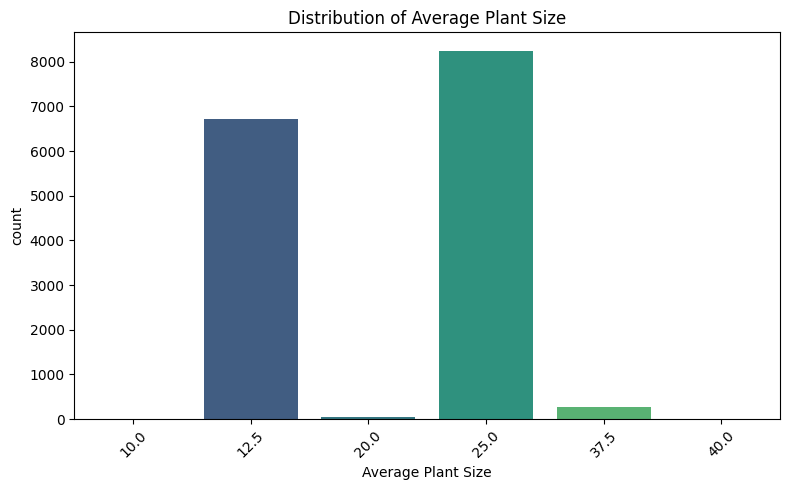

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


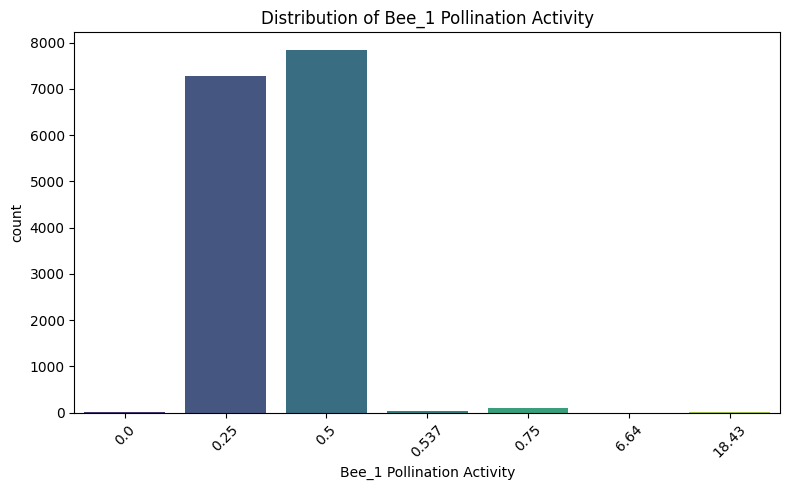

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


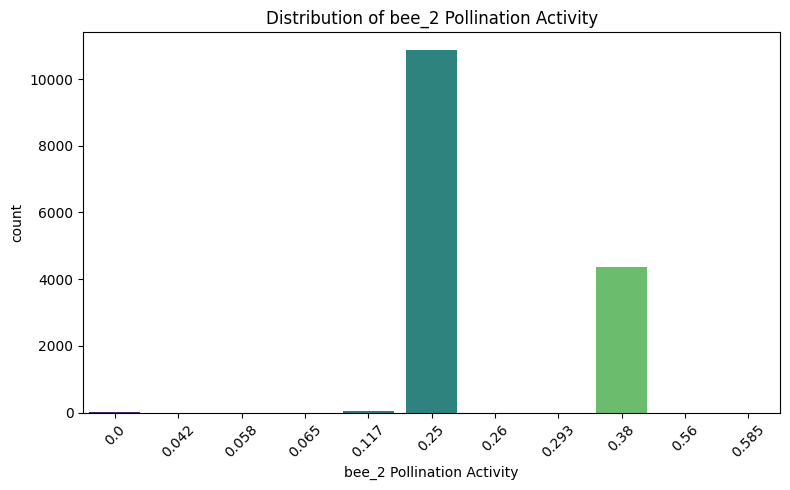

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


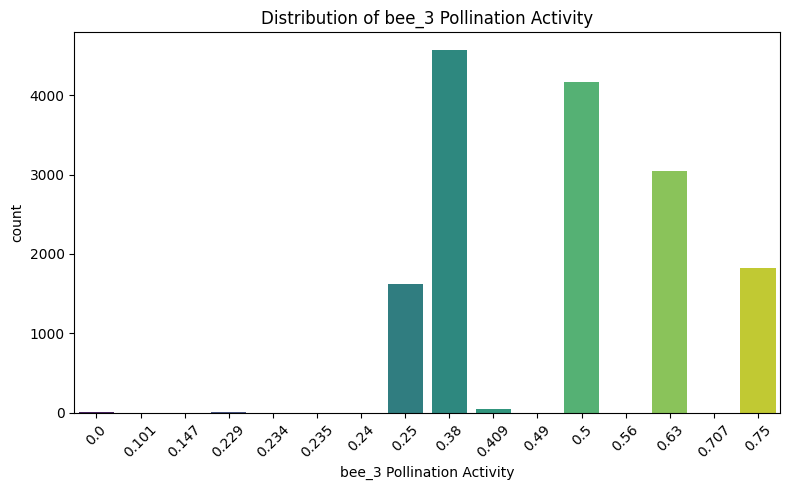

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


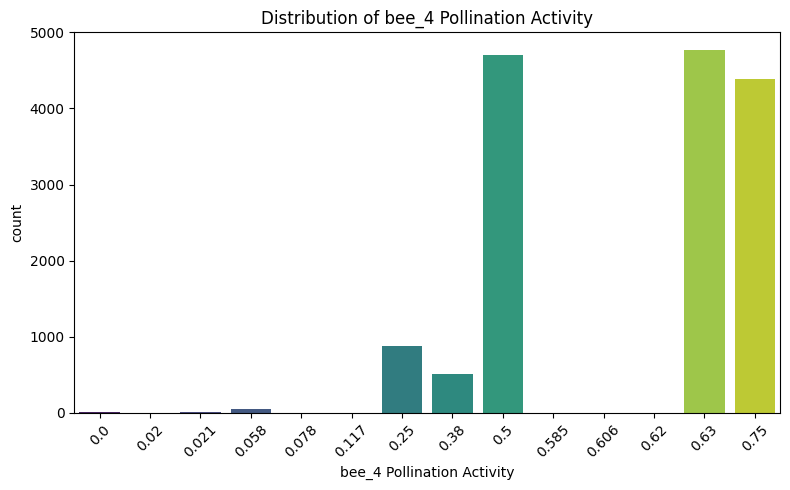

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


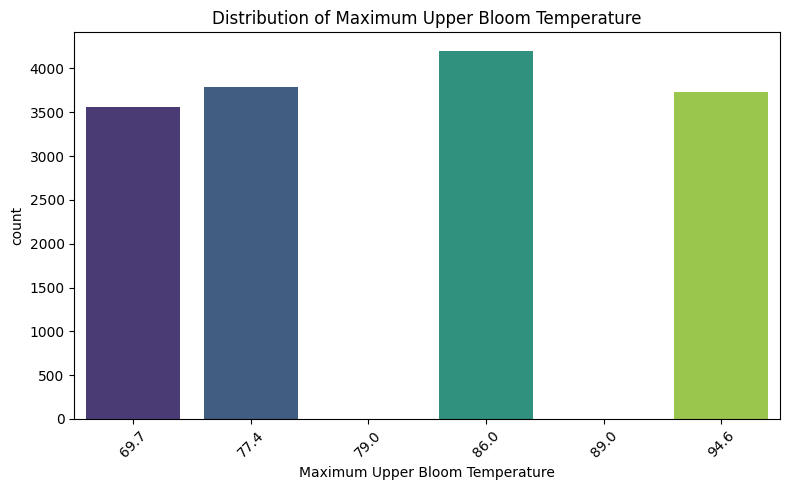

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


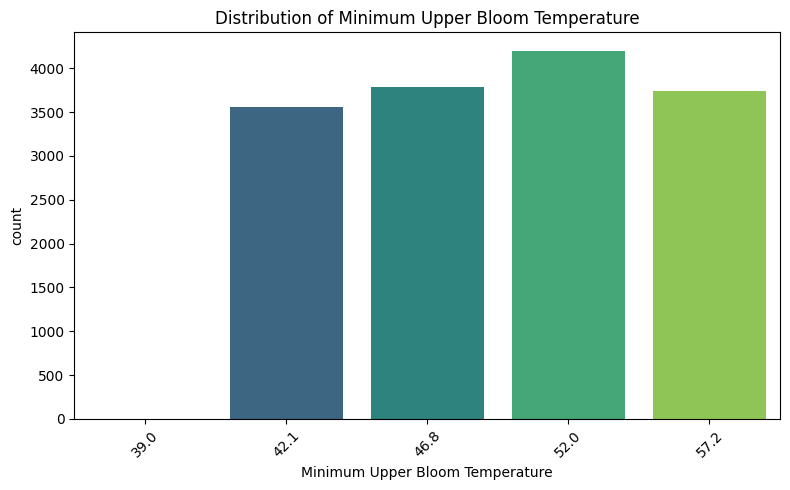

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


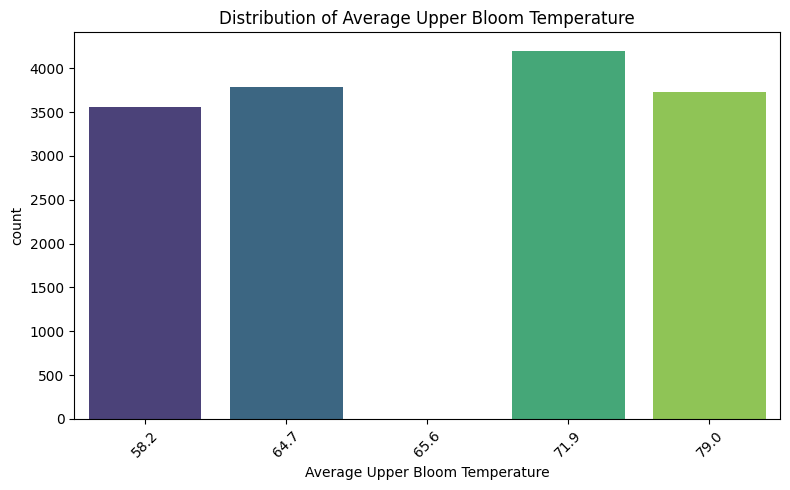

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


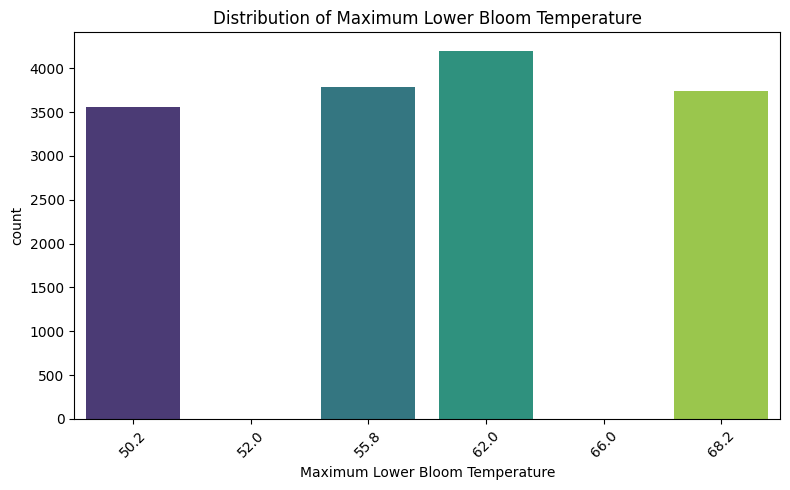

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


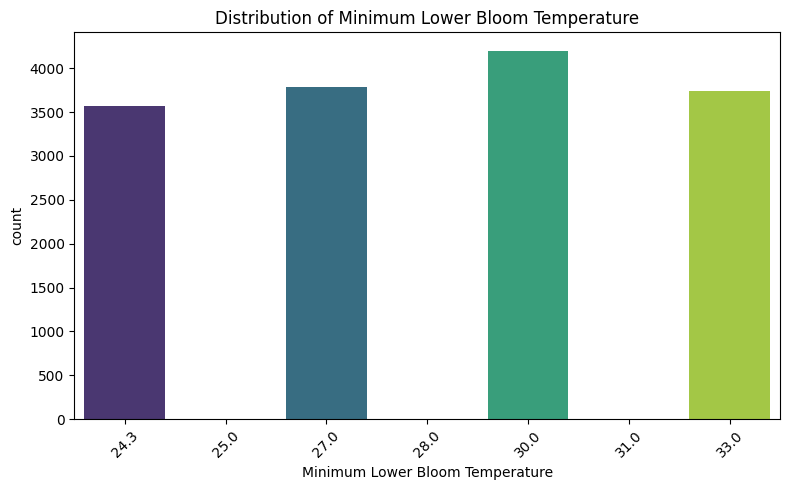

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


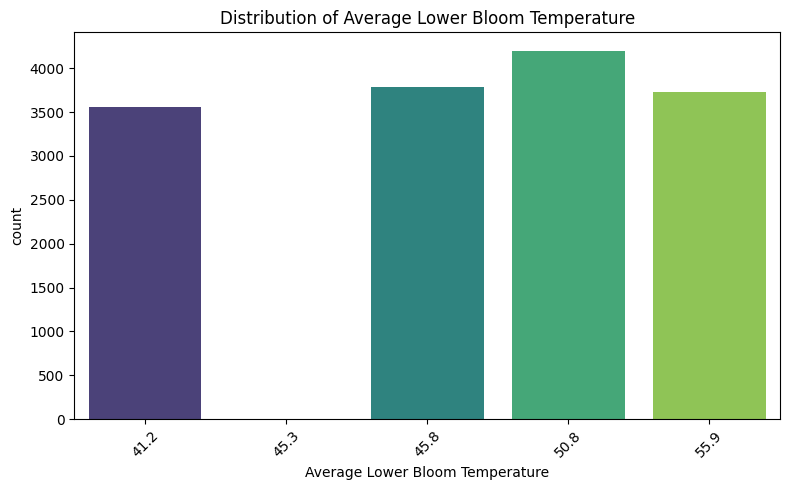

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


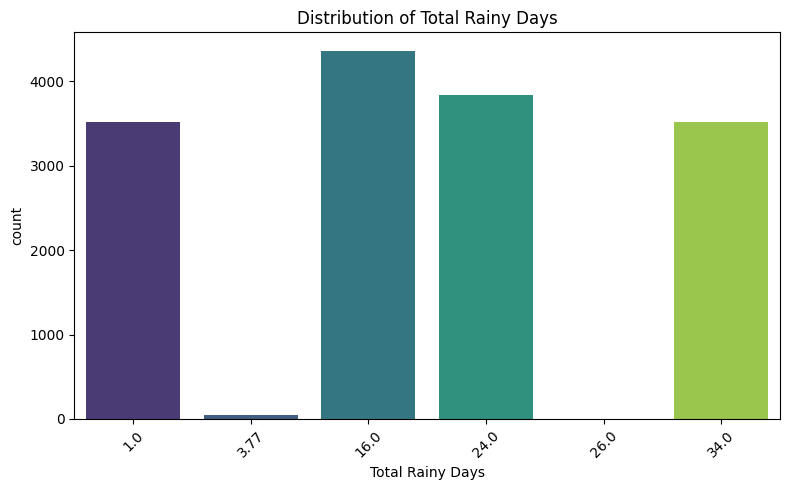

<ipython-input-11-6701541ebcf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


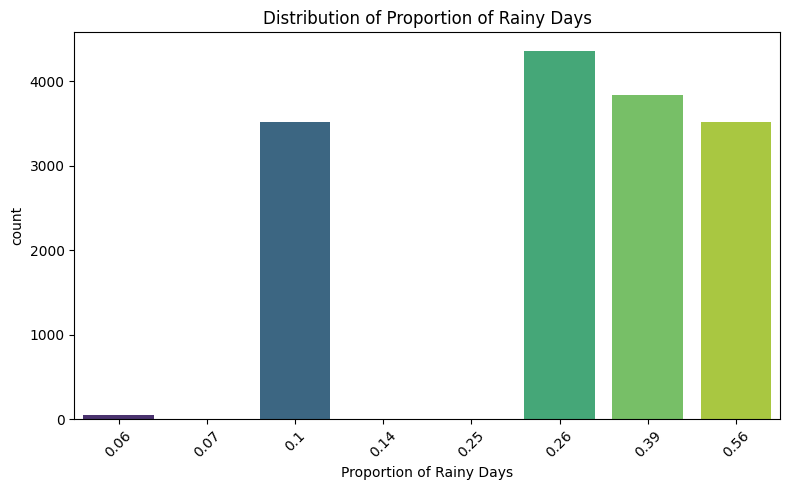

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Bee Polination Variables

We focused on five main activity levels: 0.25, 0.38, 0.5, 0.63, and 0.75, which appeared consistently and in high frequency across the different bee variables.
We rounded the value 0.537 to 0.5, as it likely resulted from measurement rounding.
We removed very rare values to ensure clean and comparable categories.


<ipython-input-12-8382c689cedf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-12-8382c689cedf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.remove_unused_categories()
<ipython-input-12-8382c689cedf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

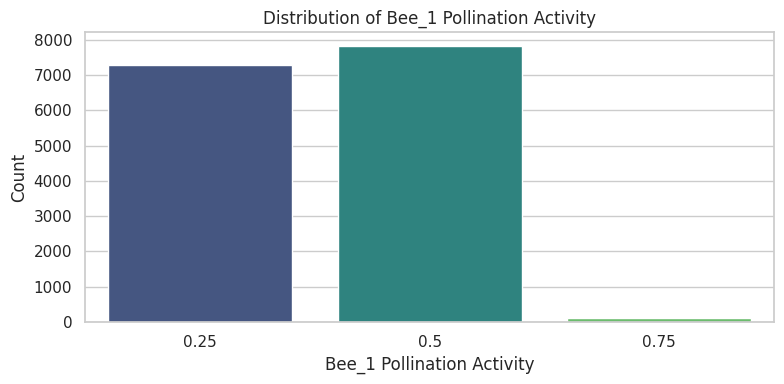

<ipython-input-12-8382c689cedf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].cat.categories, palette="viridis")


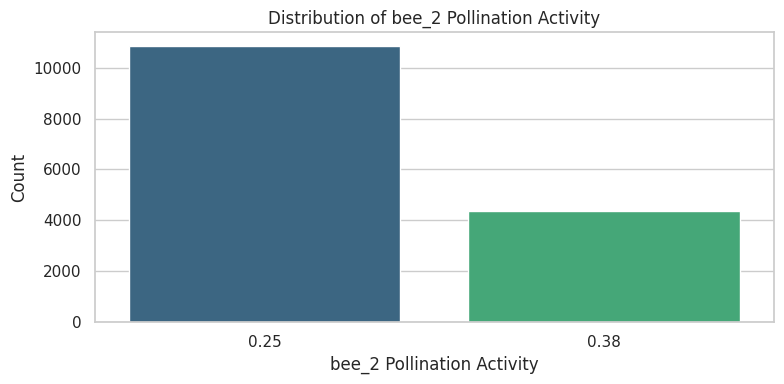

<ipython-input-12-8382c689cedf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].cat.categories, palette="viridis")


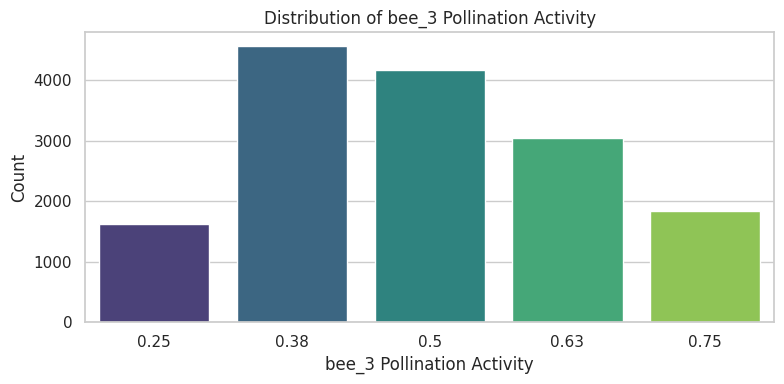

<ipython-input-12-8382c689cedf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].cat.categories, palette="viridis")


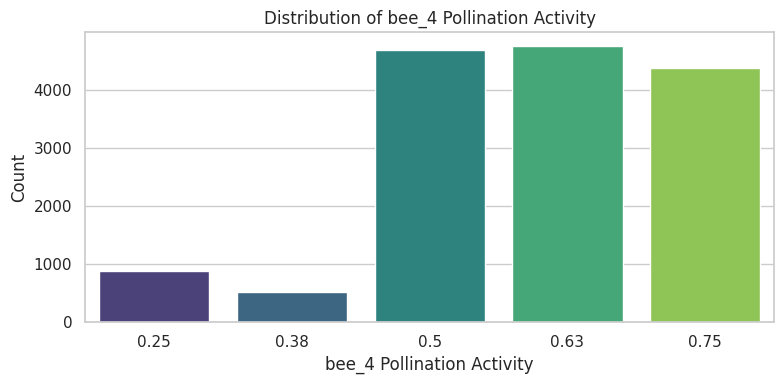

In [ ]:
bee_cols = [
    'Bee_1 Pollination Activity',
    'bee_2 Pollination Activity',
    'bee_3 Pollination Activity',
    'bee_4 Pollination Activity'
]

# removing the parts of representation of categories that we decided aren't representative
for col in bee_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.remove_unused_categories()

valid_levels = [0.25, 0.38, 0.5, 0.63, 0.75]

for col in bee_cols:
    df[col] = df[col].astype(float)
    df.loc[df[col] == 0.537, col] = 0.5  # unify 0.537 to 0.5
    df = df[df[col].isin(valid_levels)]
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.remove_unused_categories()

final_bee_categories = {col: df[col].cat.categories.tolist() for col in bee_cols}
final_bee_categories

sns.set(style="whitegrid")

for col in bee_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].cat.categories, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


Average plant size

The values 10.0, 20.00 and 40.0 appeared only a few times (4, 2, and 2 occurrences, respectively), they were extremely rare so we removed them.
We retained only the values 12.5, 20.0, 25.0, and 37.5d.


<ipython-input-13-b678aecac2f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Plant Size'] = df['Average Plant Size'].cat.remove_unused_categories()
<ipython-input-13-b678aecac2f1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Average Plant Size', data=df, palette='Set2')


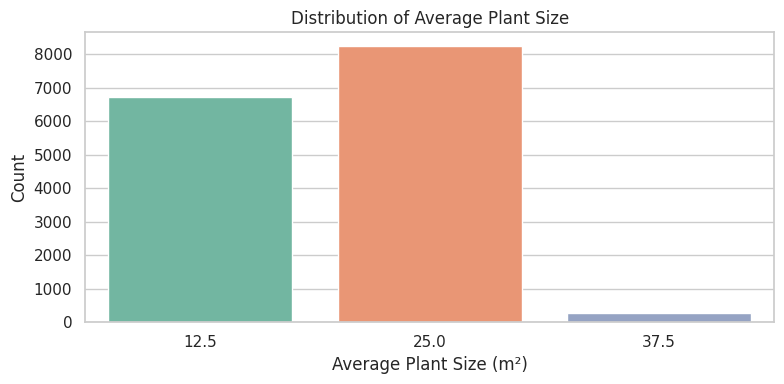

In [ ]:
df['Average Plant Size'] = df['Average Plant Size'].astype('category')

# removing the parts we decided were not a category best representation or combining it
df = df[~df['Average Plant Size'].isin([10.0, 20.0, 40.0])]

df['Average Plant Size'] = df['Average Plant Size'].cat.remove_unused_categories()

plant_size_counts = df['Average Plant Size'].value_counts().sort_index()
plant_size_counts

plt.figure(figsize=(8, 4))
sns.countplot(x='Average Plant Size', data=df, palette='Set2')
plt.title('Distribution of Average Plant Size')
plt.xlabel('Average Plant Size (m²)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Upper/Lower Bloom Temperature Variables

we removed very rare/inconsistent values

<ipython-input-14-4e3573dfb9e5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-14-4e3573dfb9e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.remove_unused_categories()
<ipython-input-14-4e3573dfb9e5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Se

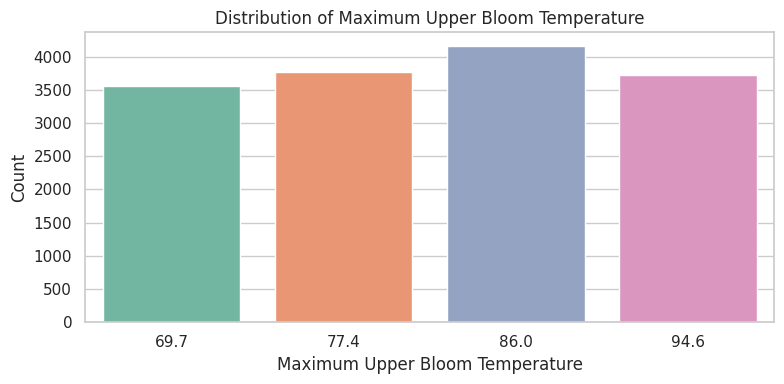

<ipython-input-14-4e3573dfb9e5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


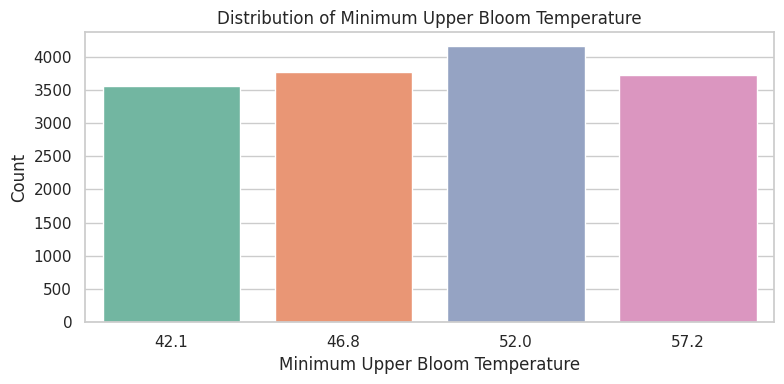

<ipython-input-14-4e3573dfb9e5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


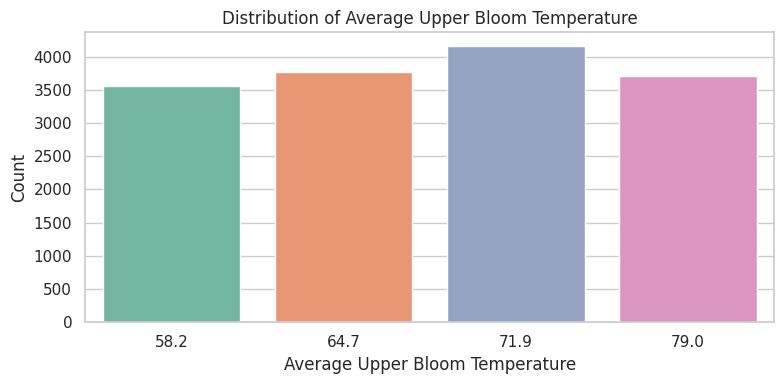

In [ ]:
# cleaning the three: Maximum Upper Bloom Temperature; remove 79.0 and 89.0, Minimum Upper Bloom Temperature; remove 39.0, Average Upper Bloom Temperature; remove 65.6 (rare value)

df = df[~df['Maximum Upper Bloom Temperature'].isin([79.0, 89.0])]
df = df[~df['Minimum Upper Bloom Temperature'].isin([39.0])]
df = df[df['Average Upper Bloom Temperature'] != 65.6]

upper_bloom_cols = [
    'Maximum Upper Bloom Temperature',
    'Minimum Upper Bloom Temperature',
    'Average Upper Bloom Temperature'
]

for col in upper_bloom_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.remove_unused_categories()

for col in upper_bloom_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


<ipython-input-15-b90525748d8e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


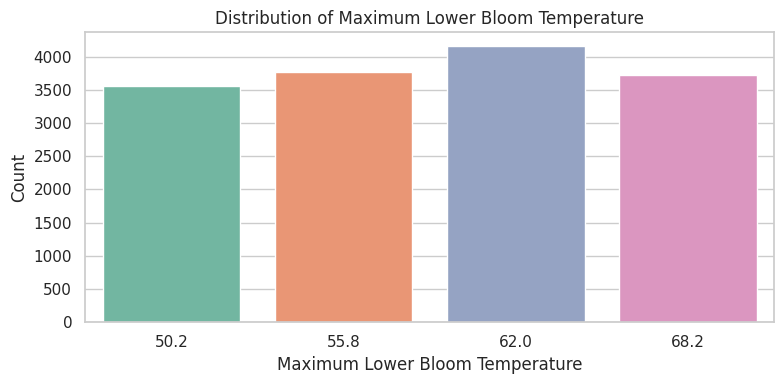

<ipython-input-15-b90525748d8e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


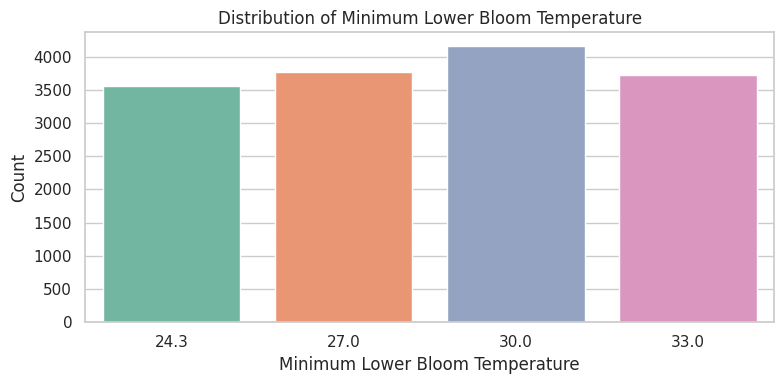

<ipython-input-15-b90525748d8e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


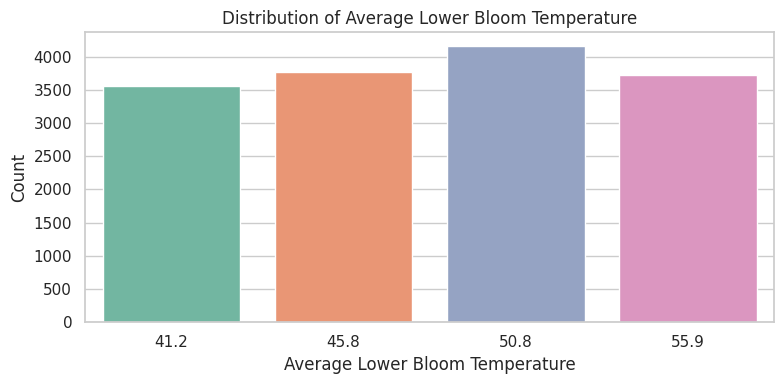

In [ ]:
# cleaning rare values from Maximum and Minimum Lower Bloom Temperature
df = df[~df['Maximum Lower Bloom Temperature'].isin([52.0, 66.0])]
df = df[~df['Minimum Lower Bloom Temperature'].isin([25.0, 31.0])]

lower_bloom_cols = [
    'Maximum Lower Bloom Temperature',
    'Minimum Lower Bloom Temperature',
    'Average Lower Bloom Temperature'
]

for col in lower_bloom_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.remove_unused_categories()

for col in lower_bloom_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


in the above plots, we see as expected from the pearson heatmap that their correlation is a perfect 1 since they are similar plots.

Rain Variables

we removed very rare/inconsistent values

<ipython-input-16-7d66f96aa0a4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


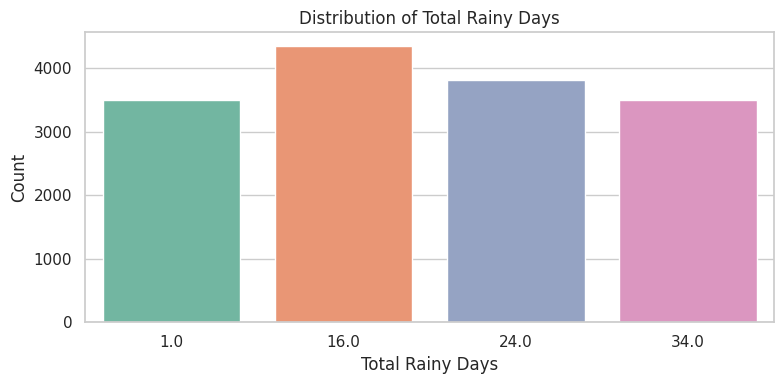

<ipython-input-16-7d66f96aa0a4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


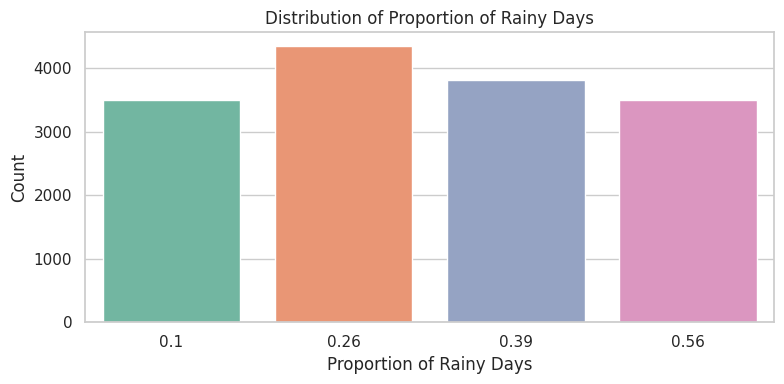

In [ ]:
# removing rare values, and unused categories later on
df = df[~df['Total Rainy Days'].isin([3.77, 26.0])]
df = df[~df['Proportion of Rainy Days'].isin([0.06, 0.14, 0.25])]

rain_cols = ['Total Rainy Days', 'Proportion of Rainy Days']
for col in rain_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.remove_unused_categories()

for col in rain_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


We can really notice by just observing the graphs that the distribution are very high correlated to one another.

Explnation of categorical variables:

Average Plant Size: Bimodal distribution, strongly concentrated at 12.5 and 25.0 m², with a smaller secondary peak at 37.5.

Bee_1 Pollination Activity: Clearly bimodal with high frequencies at 0.25 and 0.5; 0.75 appears occasionally.

bee_2 Pollination Activity: Skewed toward 0.25 and 0.38; all other values were removed to preserve consistency.

bee_3 Pollination Activity: Multimodal and relatively evenly spread across the five main activity levels.

bee_4 Pollination Activity: Similar to bee_3, but slightly more balanced; shows a smooth multi-peak distribution.

Maximum Upper Bloom Temperature: Symmetrical and centered around four key values; no extreme peaks.

Minimum Upper Bloom Temperature: Nearly uniform across four main categories; balanced and consistent.

Average Upper Bloom Temperature: Normal-like distribution over four ordered levels; outliers were removed.

Maximum Lower Bloom Temperature: Multimodal with major peaks at 50.2, 55.8, 62.0, and 68.2; sharp drop elsewhere.

Minimum Lower Bloom Temperature: Matches the multimodal structure of the maximum values; clean and consistent.

Average Lower Bloom Temperature: Smooth and symmetric across four levels; evenly distributed with no noise.

Total Rainy Days: Clearly discrete and clustered around 1, 16, 24, and 34 days — forming a step-like shape.

Proportion of Rainy Days: Mirrors the total rainy days with four distinct peaks; very low within-group variance.

All previously cleaned categorical variables were converted back to their original float type to allow for continuous statistical analysis and visualization. With no preference to the dtype float, just since most of them originally were float dtype.

In [ ]:
# converting them back to their original type
categorical_to_numeric = {
    'Average Plant Size': float,
    'Bee_1 Pollination Activity': float,
    'bee_2 Pollination Activity': float,
    'bee_3 Pollination Activity': float,
    'bee_4 Pollination Activity': float,
    'Maximum Upper Bloom Temperature': float,
    'Minimum Upper Bloom Temperature': float,
    'Average Upper Bloom Temperature': float,
    'Maximum Lower Bloom Temperature': float,
    'Minimum Lower Bloom Temperature': float,
    'Average Lower Bloom Temperature': float,
    'Total Rainy Days': float,
    'Proportion of Rainy Days': float,
}

for col, dtype in categorical_to_numeric.items():
    df[col] = df[col].astype(dtype)

df.dtypes[categorical_to_numeric.keys()]


Average Plant Size                 float64
Bee_1 Pollination Activity         float64
bee_2 Pollination Activity         float64
bee_3 Pollination Activity         float64
bee_4 Pollination Activity         float64
Maximum Upper Bloom Temperature    float64
Minimum Upper Bloom Temperature    float64
Average Upper Bloom Temperature    float64
Maximum Lower Bloom Temperature    float64
Minimum Lower Bloom Temperature    float64
Average Lower Bloom Temperature    float64
Total Rainy Days                   float64
Proportion of Rainy Days           float64
dtype: object

Distributions of the numerical variables

> Add blockquote



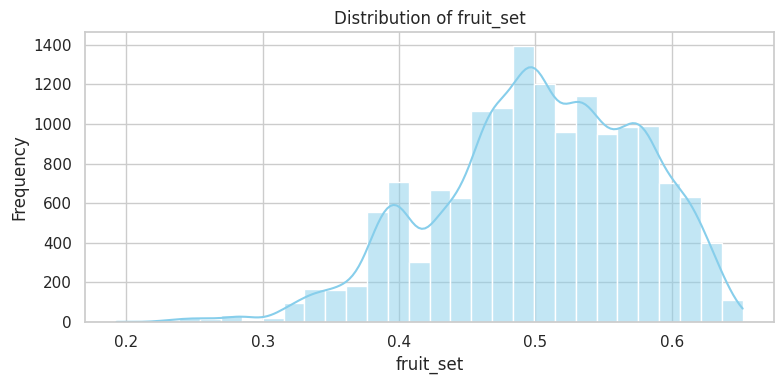

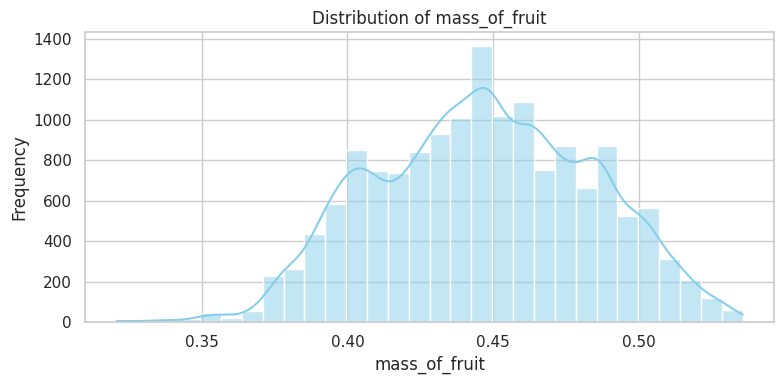

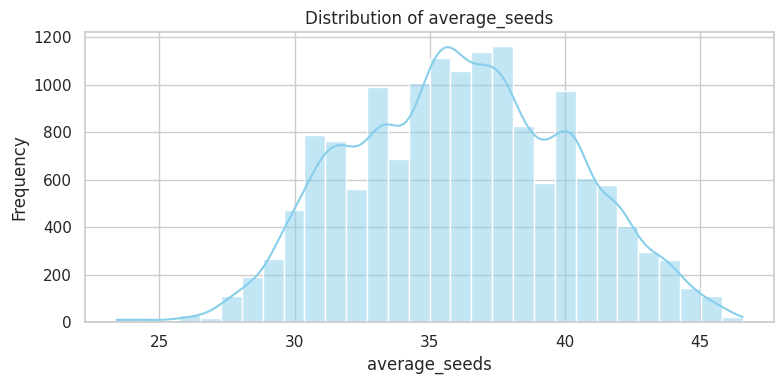

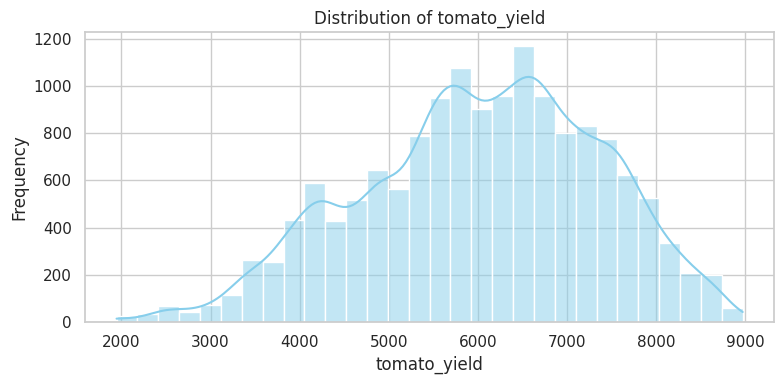

In [ ]:
# Plot histograms for each numerical variable
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


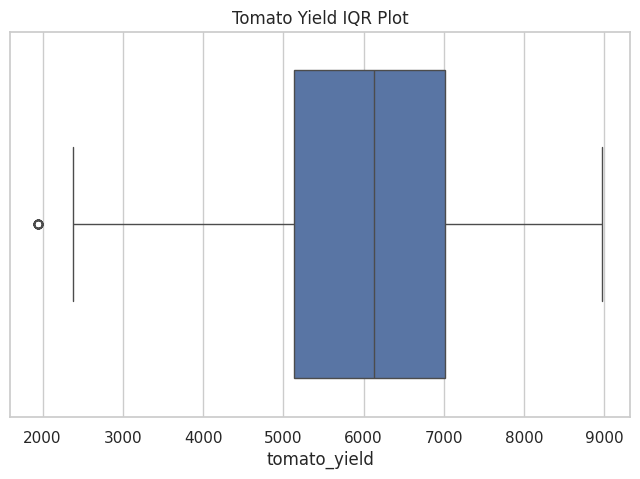

          id  Average Plant Size  Bee_1 Pollination Activity  \
287      287                25.0                        0.50   
327      327                12.5                        0.25   
614      614                25.0                        0.50   
1203    1203                25.0                        0.50   
1503    1503                25.0                        0.50   
2075    2075                25.0                        0.50   
3056    3056                25.0                        0.50   
4159    4159                12.5                        0.25   
4419    4419                25.0                        0.50   
4965    4965                25.0                        0.50   
5456    5456                25.0                        0.50   
7520    7520                37.5                        0.25   
8581    8581                37.5                        0.25   
9088    9088                37.5                        0.75   
10792  10792                12.5        

'\nNow, we will use the IQR method for detecting possible outliers or extremes.\nRemembering our lectures and that not always they are outliers and sometimes they are actuall logical data points when only looking at tomato yield variable since its tail was a bit thicker.\n\nAfter the outliers were seen we printed only the ones that the IQR saw as feasible outliers and observed their row in the table.\nWhere you obviously can see they are all the same values meaning that it is probably a different area of measurments being taken.\n\nAfter printing it into a table we see that it is all 26 values are the same value just extreme but precise, meaning it is probably a different area of measurements taken\nfrom a different zone or place, so we are choosing to keep it as is and not remove them\n  '

In [ ]:
# let's observe IQR for 'tomato_yield'
Q1 = df["tomato_yield"].quantile(0.25)
Q3 = df["tomato_yield"].quantile(0.75)
IQR = Q3 - Q1

# plot the tomato yield IQR plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["tomato_yield"])
plt.title("Tomato Yield IQR Plot")
plt.show()

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df[(df["tomato_yield"] < lower_bound) | (df["tomato_yield"] > upper_bound)]
num_outliers = outliers_df.shape[0]

lower_bound, upper_bound, num_outliers
# printing rows that are possible outliers in our tomato_yield variable
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outliers_df)


"""
Now, we will use the IQR method for detecting possible outliers or extremes.
Remembering our lectures and that not always they are outliers and sometimes they are actuall logical data points when only looking at tomato yield variable since its tail was a bit thicker.

After the outliers were seen we printed only the ones that the IQR saw as feasible outliers and observed their row in the table.
Where you obviously can see they are all the same values meaning that it is probably a different area of measurments being taken.

After printing it into a table we see that it is all 26 values are the same value just extreme but precise, meaning it is probably a different area of measurements taken
from a different zone or place, so we are choosing to keep it as is and not remove them
  """

The variable fruit_set appears roughly normal, maybe slightly skewed to the left. It's not heavy-tailed, which means no major outliers so we didn't discard any value.
We noticed that the variables fruit_set, mass_of_fruit, and average_seeds already resemble normal distributions, and the values outside the whiskers remain reasonable. Therefore, we decided to use only log and diff transformations for normalization, and chose not to apply the IQR method or any other normalization technique for these variables.

Especially after checking the IQR for the tomato yield seperately. And discovering it is probably a good sample just from a different place with other affects.

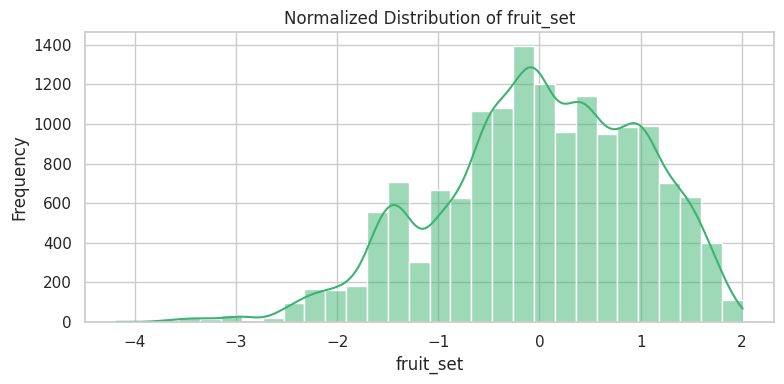

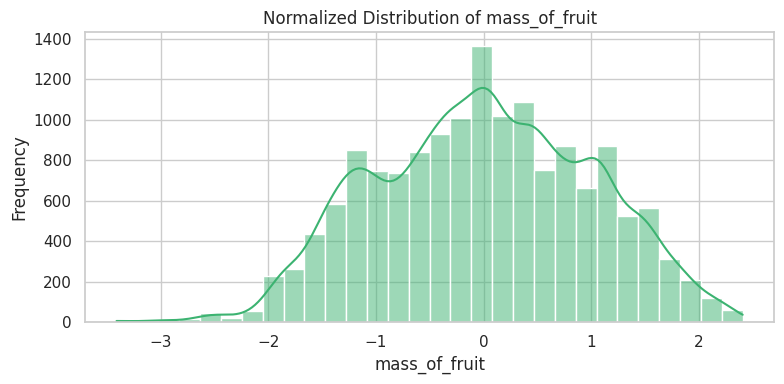

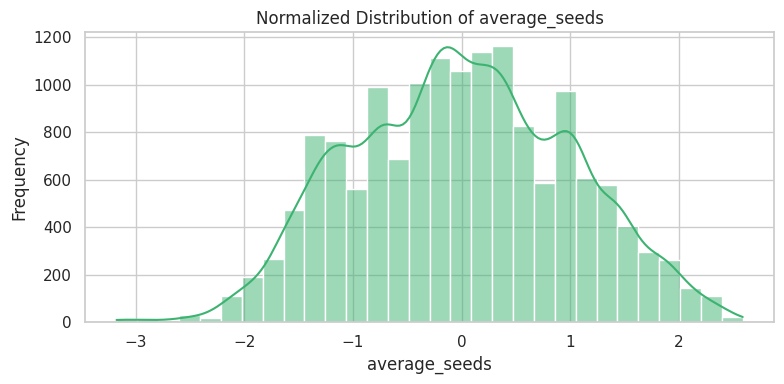

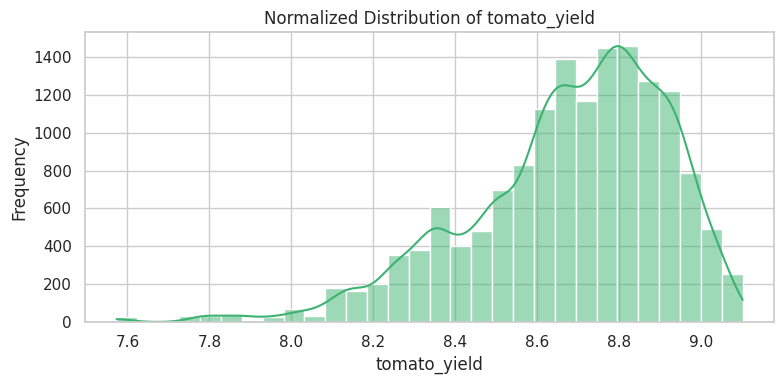

In [ ]:
df_normalized = df.copy()

# applying Z-score normalization for three of the four numerical variables since we read about each of their result graphs and decided this is the best normalization for them
zscore_columns = ["fruit_set", "mass_of_fruit", "average_seeds"]
scaler = StandardScaler()
df_normalized[zscore_columns] = scaler.fit_transform(df[zscore_columns])

# we decided on log normalization for 'tomato_yield' since it was the only variable that was indeed a bit more skewed and therfore we wanted to make it better for further analyzation of the data
df_normalized["tomato_yield"] = np.log(df["tomato_yield"] + 1e-5)

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_normalized[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'Normalized Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

numerical_columns = [col for col in df_normalized.columns]


The log transformation has successfully compressed the long right tail, making the distribution more compact and nearly symmetric. and the rest are centered around 0 with a standard deviation of 1, as expected from z-score normalization. Their bell shapes are preserved, and scaling makes them comparable.

Now we want to observe the correlation of the variables, and see what variables can tell us more about what and also if we want to eventually predict the data we can see what correlations we can use.

We will use the pearson correlation matrix.

<ipython-input-21-8996435f7424>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(


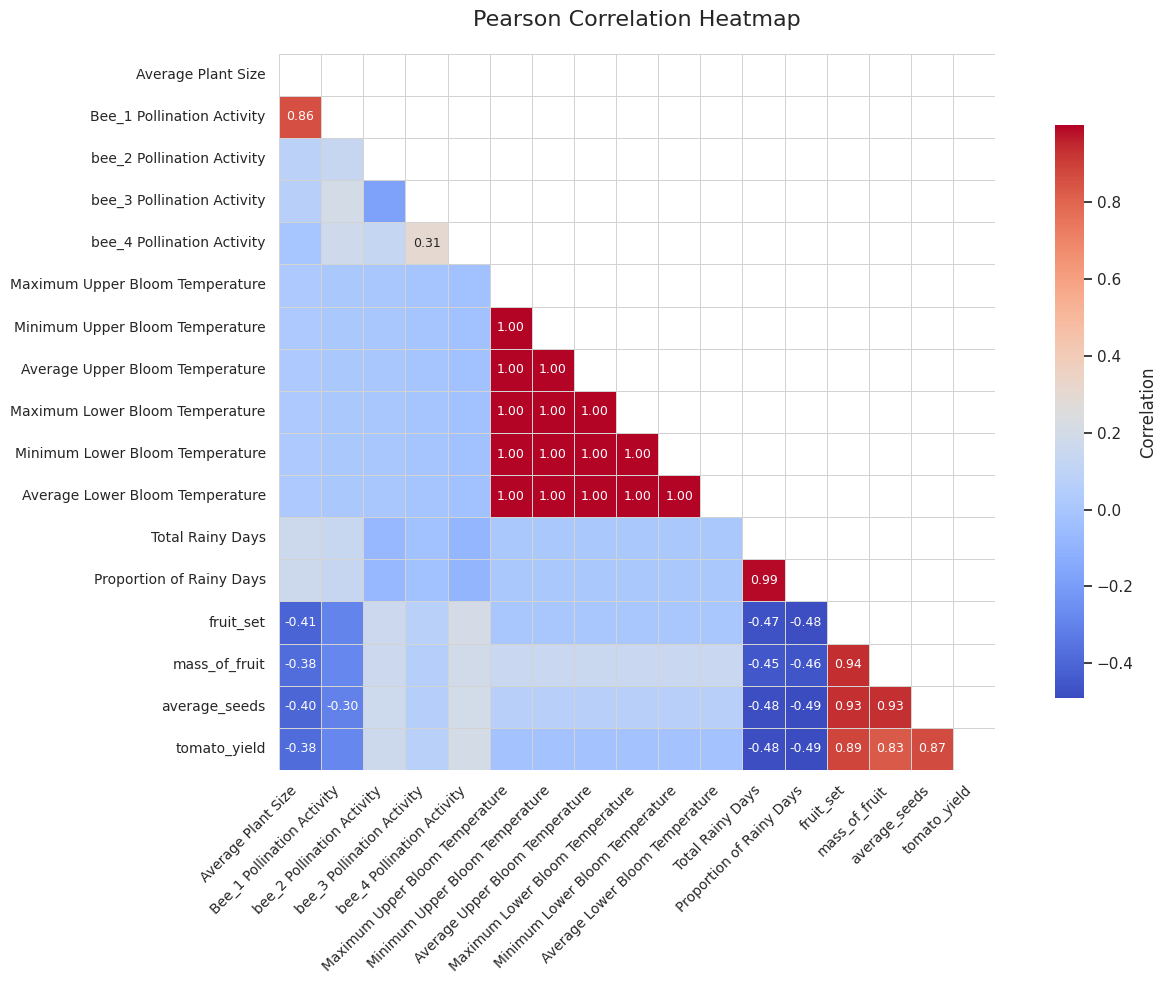

Top strong correlations (|r| >= 0.3):
Minimum Lower Bloom Temperature  Average Upper Bloom Temperature    0.999992
Average Upper Bloom Temperature  Minimum Lower Bloom Temperature    0.999992
Average Lower Bloom Temperature  Minimum Lower Bloom Temperature    0.999991
Minimum Lower Bloom Temperature  Average Lower Bloom Temperature    0.999991
Average Upper Bloom Temperature  Average Lower Bloom Temperature    0.999977
Average Lower Bloom Temperature  Average Upper Bloom Temperature    0.999977
Minimum Lower Bloom Temperature  Maximum Upper Bloom Temperature    0.999970
Maximum Upper Bloom Temperature  Minimum Lower Bloom Temperature    0.999970
                                 Average Lower Bloom Temperature    0.999959
Average Lower Bloom Temperature  Maximum Upper Bloom Temperature    0.999959
dtype: float64


In [ ]:
original_columns = [col for col in df.columns if not col.startswith("log_")]
filtered_df = df[original_columns]
filtered_df = filtered_df.drop(columns="id")

correlation_matrix = filtered_df.corr(method="pearson", numeric_only=True)

strong_corr_threshold = 0.3

annot_matrix = correlation_matrix.applymap(
    lambda x: f"{x:.2f}" if abs(x) >= strong_corr_threshold else ""
)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.set(style="white")

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=annot_matrix,
    fmt="",
    linewidths=0.6,
    linecolor="lightgray",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 9},
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Pearson Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# printing the strongest correlations so we can see if some are redundant and take care of them for better heatmap presentation of correlations
corr_pairs = correlation_matrix.unstack()
strong_pairs = corr_pairs[
    (abs(corr_pairs) >= strong_corr_threshold) & (abs(corr_pairs) < 1)
].sort_values(key=abs, ascending=False)
strong_pairs = strong_pairs[
    ~strong_pairs.index.duplicated(keep="first")
]

print("Top strong correlations (|r| >= 0.3):")
print(strong_pairs.head(10))


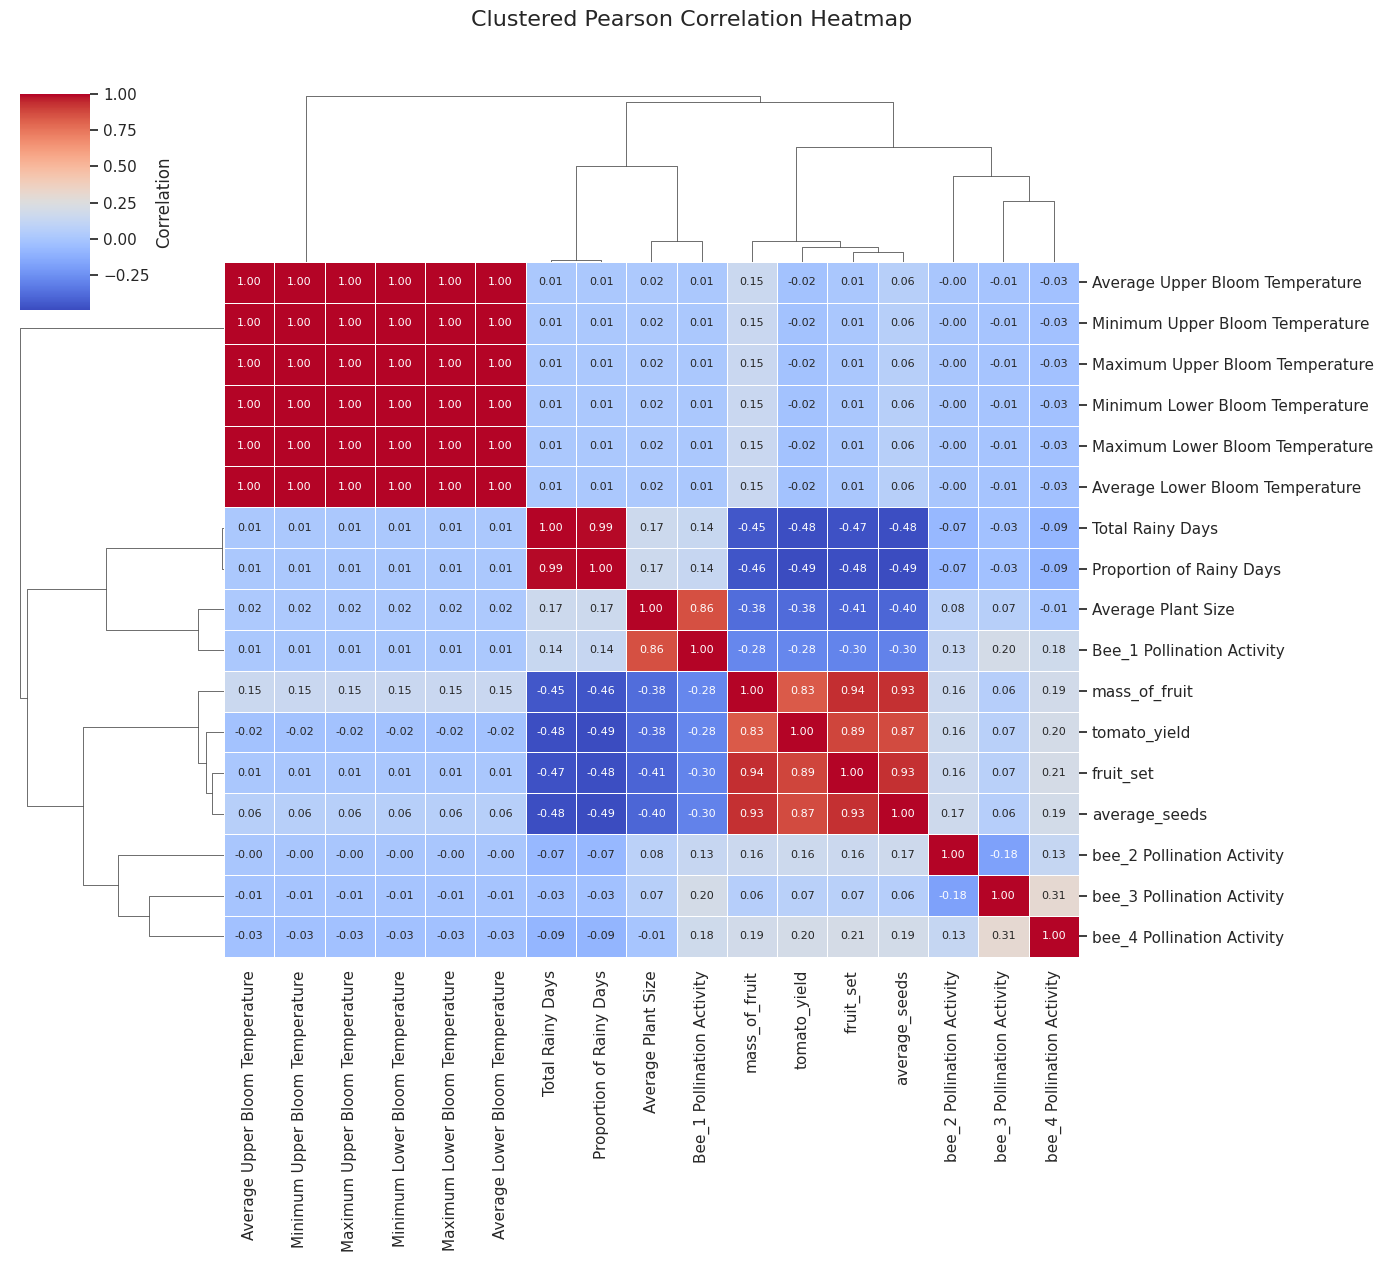

In [ ]:
sns.set(style="white")

# Create clustermap with hierarchical clustering
sns.clustermap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    figsize=(14, 12),
    cbar_kws={"label": "Correlation"},
    annot_kws={"size": 8},
)

plt.suptitle("Clustered Pearson Correlation Heatmap", fontsize=16, y=1.05)
plt.show()


Now we will clear out the rest and get the final heatmap that represents the best the correlations between the different variables.

Total rainy days and Proportion of rainy days show a perfect linear correlation, as seen in the graphs and confirmed by the Pearson correlation coefficients. Therefore, we will retain only the variable Proportion of rainy days and discard Total rainy days. We chose to keep Proportion of rainy days because it provides more informative insight: the total number of rainy days alone does not indicate how long the experiment lasted, whereas the proportion gives a clearer sense of how rainy the period was. The perfect correlation between the two variables also suggests that the duration of the experiment was the same in all cases.

Maximum Lower Bloom Temperature, Minimum Lower Bloom Temperature, Average Lower Bloom Temperature, Maximum Upper Bloom Temperature, Minimum Upper Bloom Temperature, and Average Upper Bloom Temperature all exhibit a perfect linear correlation, as observed in the graphs and confirmed by the Pearson correlation coefficients. Therefore, we chose to retain only Average Upper Bloom Temperature—the choice was arbitrary, and any of the six variables could have been kept without affecting the analysis. From just looking at the dataset, we can see that many rows have identical values across the temperature variables columns, which aligns with the observed perfect correlation.

Dropped highly correlated variables (|r| >= 0.9999): ['Average Upper Bloom Temperature', 'Minimum Lower Bloom Temperature', 'Average Lower Bloom Temperature']


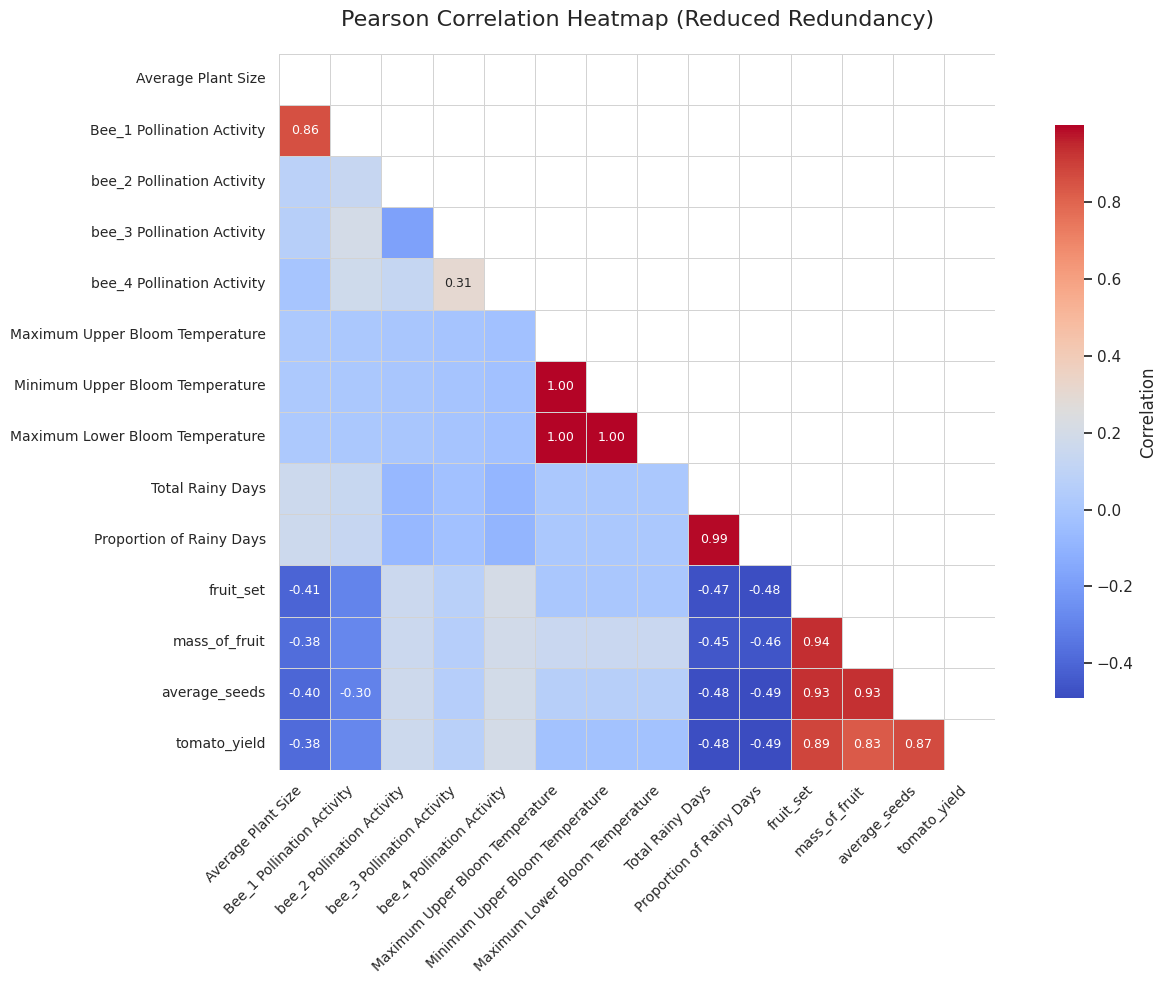


Top strong correlations after removing redundant variables (|r| ≥ 0.3):
Maximum Upper Bloom Temperature  Maximum Lower Bloom Temperature    0.999726
Maximum Lower Bloom Temperature  Maximum Upper Bloom Temperature    0.999726
Maximum Upper Bloom Temperature  Minimum Upper Bloom Temperature    0.999482
Minimum Upper Bloom Temperature  Maximum Upper Bloom Temperature    0.999482
                                 Maximum Lower Bloom Temperature    0.999269
Maximum Lower Bloom Temperature  Minimum Upper Bloom Temperature    0.999269
Total Rainy Days                 Proportion of Rainy Days           0.991498
Proportion of Rainy Days         Total Rainy Days                   0.991498
fruit_set                        mass_of_fruit                      0.938029
mass_of_fruit                    fruit_set                          0.938029
dtype: float64


In [ ]:
redundant_threshold = 0.9999

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify variables with near-perfect correlation to others
redundant_cols = [
    column for column in upper_triangle.columns
    if any(abs(upper_triangle[column]) > redundant_threshold)
]

# Drop them from the filtered_df
reduced_df = filtered_df.drop(columns=redundant_cols)

print("Dropped highly correlated variables (|r| >= 0.9999):", redundant_cols)

correlation_matrix = reduced_df.corr(method="pearson", numeric_only=True)

annot_matrix = correlation_matrix.map(
    lambda x: f"{x:.2f}" if abs(x) >= strong_corr_threshold else ""
)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# plotting the new and redefined heatmap
plt.figure(figsize=(14, 10))
sns.set(style="white")

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=annot_matrix,
    fmt="",
    linewidths=0.6,
    linecolor="lightgray",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 9},
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Pearson Correlation Heatmap (Reduced Redundancy)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# printing our still strong correlations making sure they are what we would have expected at this point
corr_pairs = correlation_matrix.unstack()
strong_pairs = corr_pairs[
    (abs(corr_pairs) >= strong_corr_threshold) & (abs(corr_pairs) < 1)
].sort_values(key=abs, ascending=False)

strong_pairs = strong_pairs[~strong_pairs.index.duplicated(keep="first")]

print("\nTop strong correlations after removing redundant variables (|r| ≥ 0.3):")
print(strong_pairs.head(10))


<ipython-input-24-20e8339371a4>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(


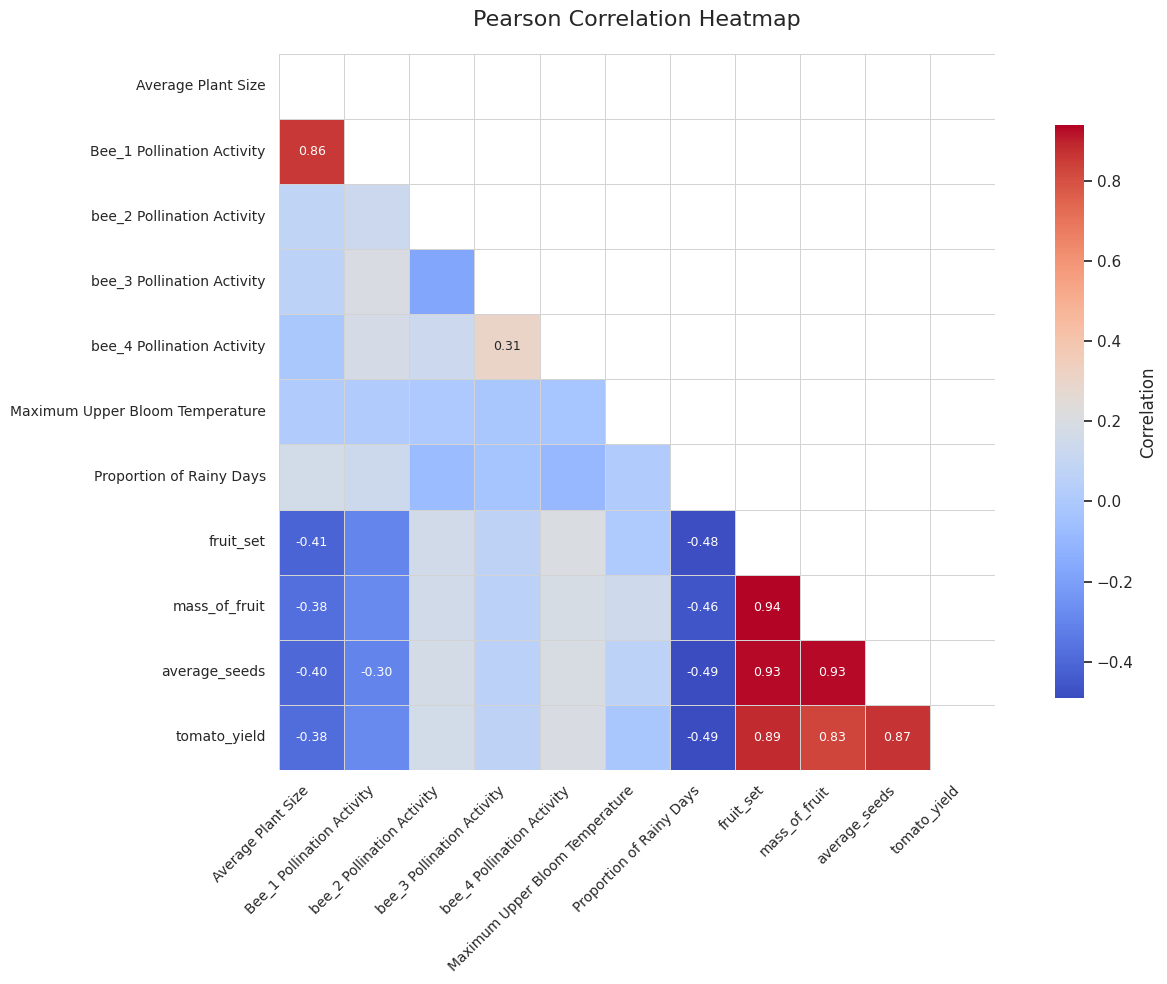

mass_of_fruit  fruit_set        0.938029
fruit_set      mass_of_fruit    0.938029
mass_of_fruit  average_seeds    0.931486
average_seeds  mass_of_fruit    0.931486
               fruit_set        0.930744
fruit_set      average_seeds    0.930744
               tomato_yield     0.886716
tomato_yield   fruit_set        0.886716
average_seeds  tomato_yield     0.870213
tomato_yield   average_seeds    0.870213
dtype: float64

In [ ]:
# here we continue to make the heatmap relevant and focused for best results and only representations of one of each very highly correlated variables. meaning we only want to have one tempeture representation and
# to remove total rainy days and leaving only proportion of rainy days from the reasons we will further explain in the rest of the project

columns_to_remove = [
    "Minimum Upper Bloom Temperature",
    "Maximum Lower Bloom Temperature",
    "Minimum Lower Bloom Temperature",
    "Average Lower Bloom Temperature",
    "Total Rainy Days"
]

final_df = reduced_df.drop(columns=columns_to_remove, errors="ignore")

correlation_matrix = final_df.corr(method="pearson", numeric_only=True)

annot_matrix = correlation_matrix.applymap(
    lambda x: f"{x:.2f}" if abs(x) >= strong_corr_threshold else ""
)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(14, 10))
sns.set(style="white")

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=annot_matrix,
    fmt="",
    linewidths=0.6,
    linecolor="lightgray",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 9},
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Pearson Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

corr_pairs = correlation_matrix.unstack()
strong_pairs = corr_pairs[
    (abs(corr_pairs) >= strong_corr_threshold) & (abs(corr_pairs) < 1)
].sort_values(key=abs, ascending=False)
strong_pairs = strong_pairs[~strong_pairs.index.duplicated(keep="first")]

strong_pairs.head(10)


After clearing the redundant variables, we definetly see something good here that makes sense. Having all the tempetures related to one another, and all the numerical factors have a strong pearson correlation which is good for us if we would liked to predict tomato yield with one of those variables that would probably be successfull.

We can see that all the numerical variables have a very high correlation to the tomato_yield and so if we had to choose numerically the highest correlation is with fruit_set, but since they all have very high correlation we thought it would best in actual life work to choose the one where it is easiet\ cheapest to collect a certain type of data that will make our model better predict when using that just from relevant new data and that could make much more difference then 0.2-0.5 difference in numerical linear correlation. That is for example for linear regression model or other models that rely on one specific linear relation to the predicting variable.

All correlations of variables vs tomato yield variable considering whether they are numerical or categorial variables to decide on what graph we shall use:

Tomato Yield correlations:
fruit_set        0.886716
average_seeds    0.870213
mass_of_fruit    0.827715
Name: tomato_yield, dtype: float64


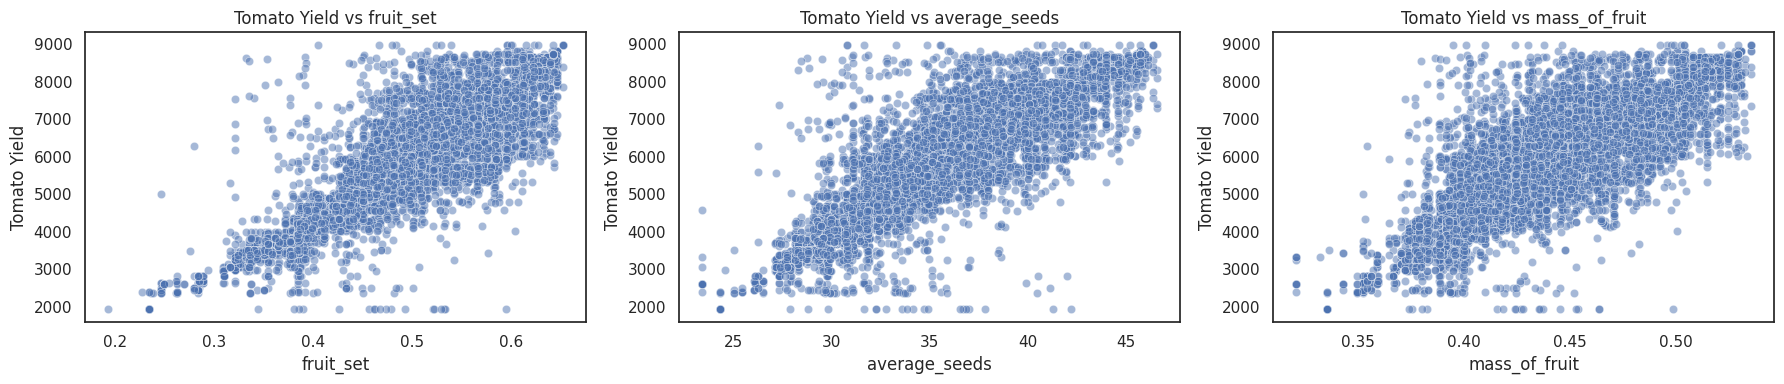

In [ ]:
numericals = ["fruit_set", "average_seeds", "mass_of_fruit"]

correlation_matrix = df[numericals + ["tomato_yield"]].corr()
tomato_yield_corr = correlation_matrix["tomato_yield"].drop("tomato_yield")

print("Tomato Yield correlations:")
print(tomato_yield_corr.sort_values(ascending=False))

# Scatter plots since its numeric vs numeric
num_features = len(numericals)
cols_per_row = 3
rows = math.ceil(num_features / cols_per_row)

plt.figure(figsize=(cols_per_row * 6, rows * 4))

for i, col in enumerate(numericals):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.scatterplot(x=df[col], y=df["tomato_yield"], alpha=0.5)
    plt.title(f"Tomato Yield vs {col}")
    plt.xlabel(col)
    plt.ylabel("Tomato Yield")

plt.tight_layout()
plt.show()


Tomato yield vs fruit set: the higher the fruit set the higher the tomato yield will be, and that makes sense since the better the pollination the more fruits will set resulting in higher tomato yields.

Tomato yield vs average seeds: again very high correlation was shown (both here and in the heatmap). Which makes sense since higher seed number per fruit is a result of good pollination therefore the more seeds per fruit the higher the tomato yield will be.

Tomato yield vs mass of fruit: again, very high correlation as seen before in the heatmap. Which makes sense since in a good pollination scenario more fruits set, containning higher seed numbers and resulting in higher mass of fruit.

Visualizations of each variable and each pair of variables (together and seperately

of course we are taking into account what type of column it is, numeric or categorical further explained after this part.

['fruit_set', 'average_seeds', 'mass_of_fruit', 'tomato_yield']


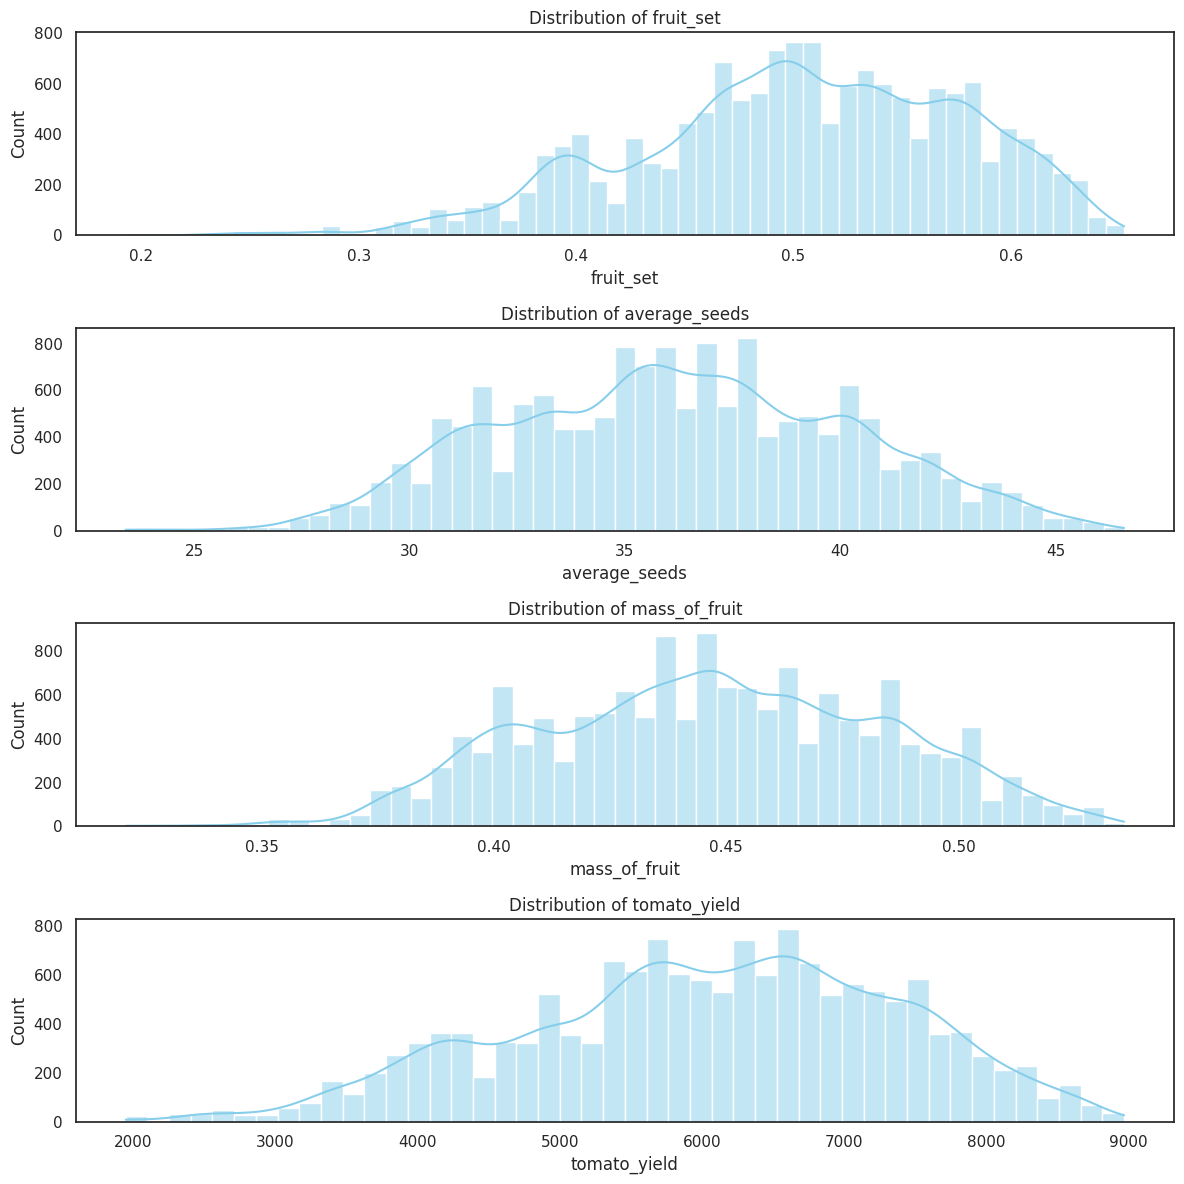

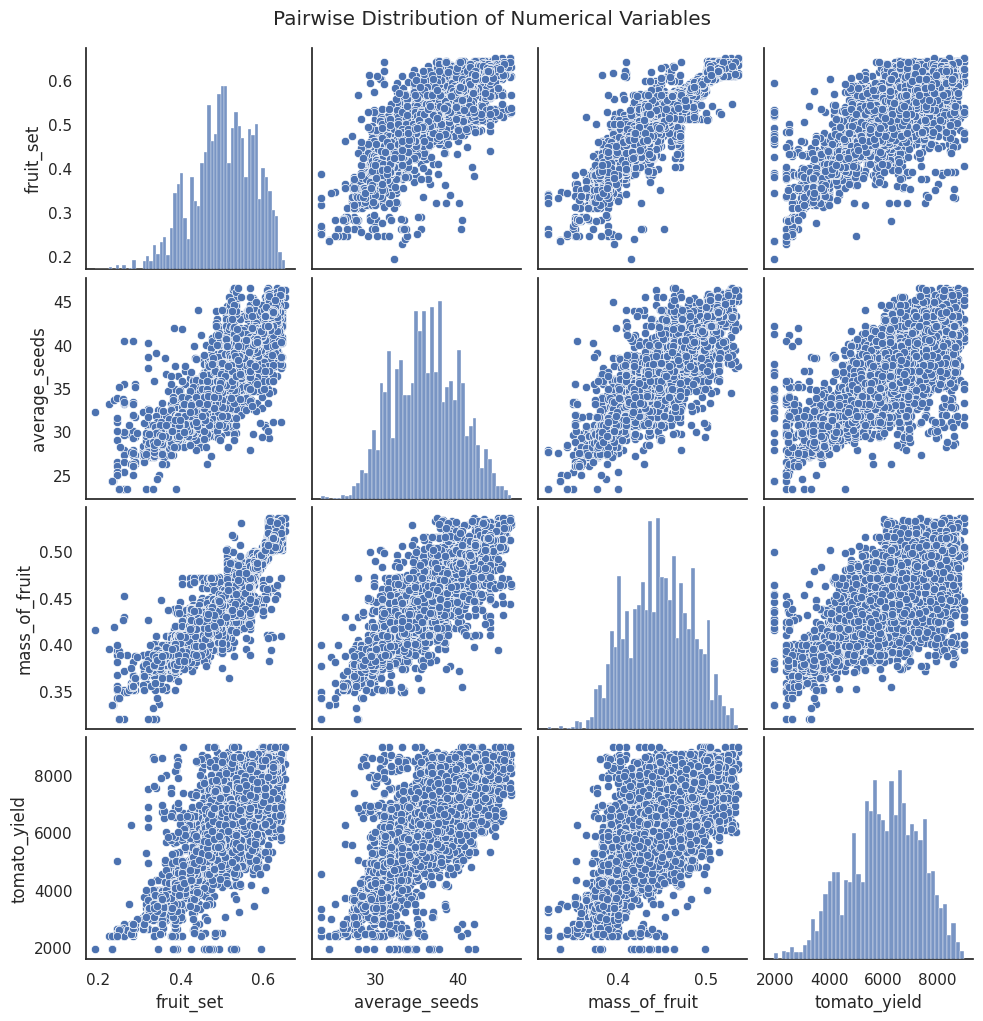

In [ ]:
# distributionsss:
numericals = ["fruit_set", "average_seeds", "mass_of_fruit", "tomato_yield"]

print(numericals)
# for numerical variables: histogram + KDE
plt.figure(figsize=(12, len(numericals) * 3))
for i, col in enumerate(numericals):
    plt.subplot(len(numericals), 1, i + 1)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


# pairwise relationships of numerical variables
sns.pairplot(df[numericals])
plt.suptitle("Pairwise Distribution of Numerical Variables", y=1.02)
plt.show()


We can see observing the graphs we didn't look at before:
fruit set vs mass of fruit: we can see that the higher the fruit set the higher the mass of fruit. In a very nice looking correlations thanks to the density of the scatter.
fruit set vs average seeds: higher average seeds levels were shown with high correlation to the percentage of fruit set.
average seeds vs mass of fruit: clearly a good correlation with a nice distribution of the data around a linear correlation.
Which fits with the pearson correlation heatmap since they got 0.94 fruit set vs mass of fruit ,0.93 for the other two.

 Visualization of each variable vs tomato yield of course taking into account whether the variable is numeric or categorical when we decided on the graphs, since we know that tomato yield in numerical so if the column we are visualling to is numerical we will use scatter plots or pair plots, and for when the column of comparison if categorical we will use box plots.

also, we can already see from the pairplots what we anticipated from before, that we will have about normal distribution when for each variable compared to itself and for the correlations to have a positive correlations to one another since they do tell us information regarding each other, as we have seen in the correlation heatmap.

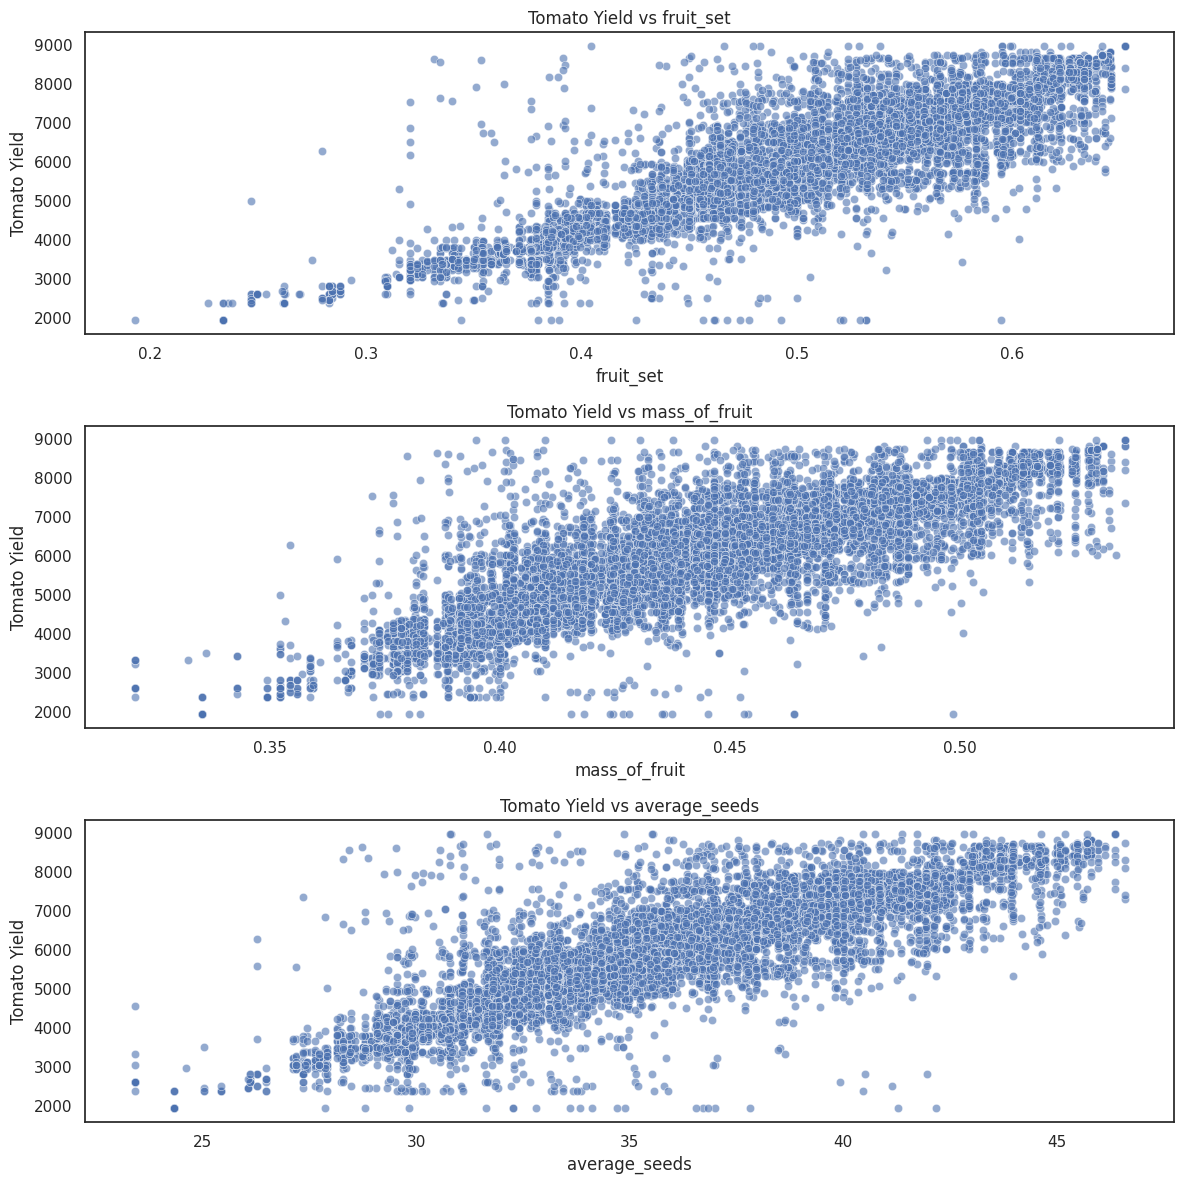

<ipython-input-27-c2b7e55d5a80>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
<ipython-input-27-c2b7e55d5a80>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
<ipython-input-27-c2b7e55d5a80>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
<ipython-input-27-c2b7e55d5a80>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

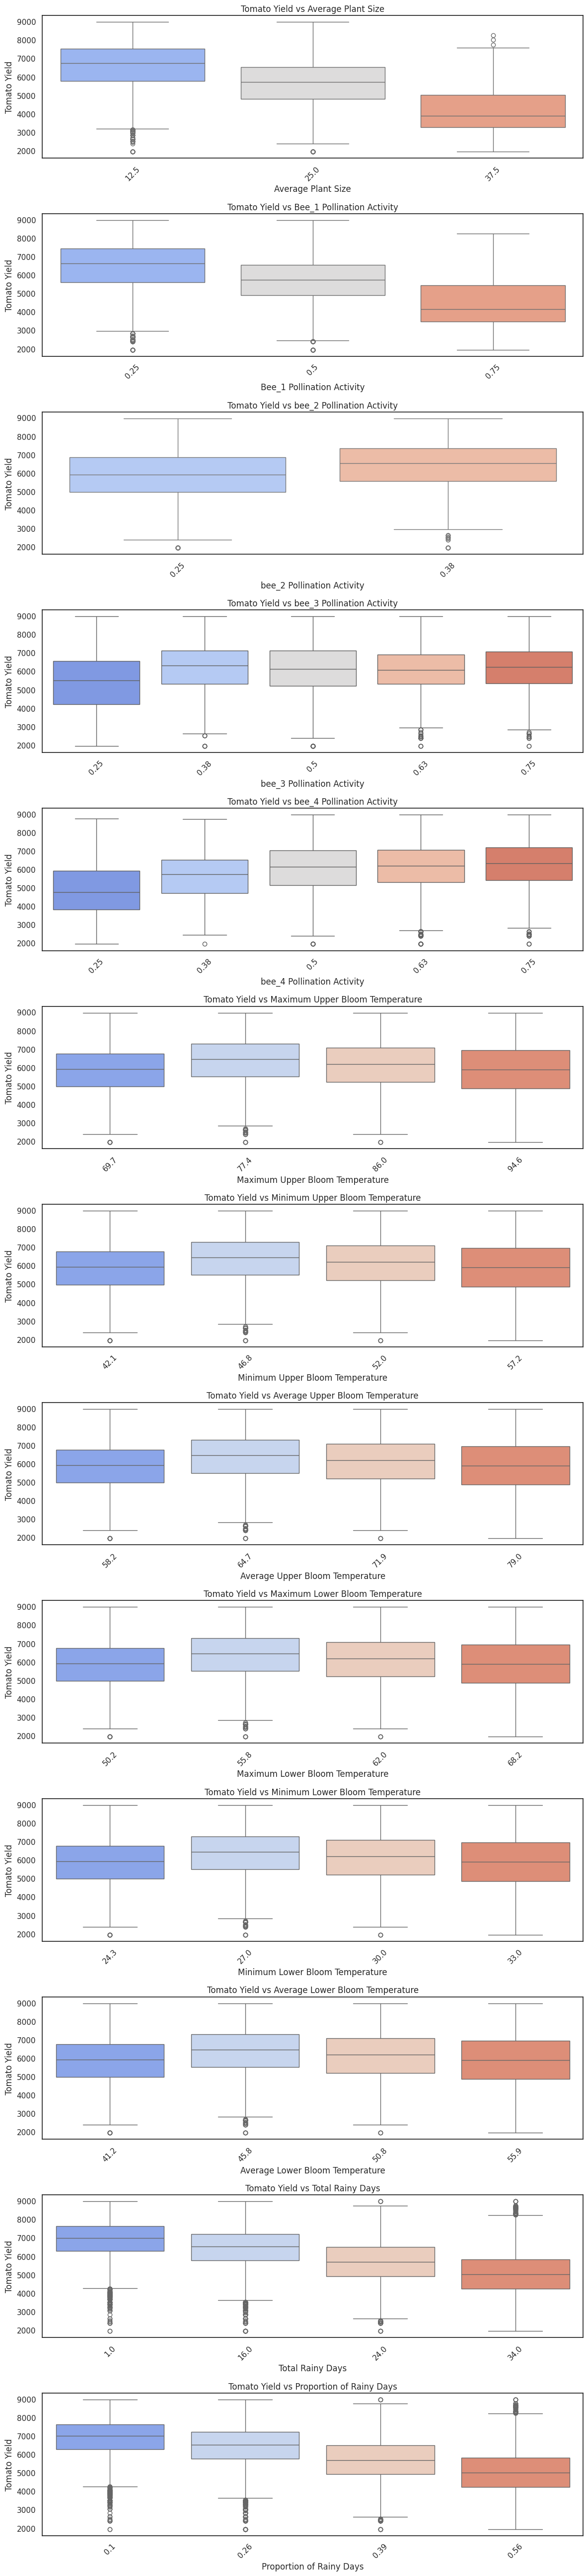

In [ ]:
categorical_columns = [
    "Average Plant Size",
    "Bee_1 Pollination Activity",
    "bee_2 Pollination Activity",
    "bee_3 Pollination Activity",
    "bee_4 Pollination Activity",
    "Maximum Upper Bloom Temperature",
    "Minimum Upper Bloom Temperature",
    "Average Upper Bloom Temperature",
    "Maximum Lower Bloom Temperature",
    "Minimum Lower Bloom Temperature",
    "Average Lower Bloom Temperature",
    "Total Rainy Days",
    "Proportion of Rainy Days",
]

numerical_columns = ["fruit_set", "mass_of_fruit", "average_seeds", "tomato_yield"]
num_vars = [col for col in numerical_columns if col != "tomato_yield"]

plt.figure(figsize=(12, len(num_vars) * 4))
for i, col in enumerate(num_vars):
    plt.subplot(len(num_vars), 1, i + 1)
    sns.scatterplot(x=df[col], y=df["tomato_yield"], alpha=0.6)
    plt.title(f"Tomato Yield vs {col}")
    plt.xlabel(col)
    plt.ylabel("Tomato Yield")
plt.tight_layout()
plt.show()

# categorical variables vs tomato yield
plt.figure(figsize=(12, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
    plt.title(f"Tomato Yield vs {col}")
    plt.xlabel(col)
    plt.ylabel("Tomato Yield")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


How Different Variables Affect Tomato Yield

The numeric variables

As expected from the Pearson correlation matrix, the numeric variables fruit_set, mass_of_fruit, and average_seeds all show a very strong linear correlation with tomato yield. As each of these variables increases, tomato yield increases as well. The strongest linear correlation is observed with fruit_set, which aligns with its having the highest Pearson correlation coefficient with tomato yield.

Average plant size

We observed that tomato yield increases as the average plant size decreases. This initially seemed surprising, so we tried to understand whether this trend could make sense biologically. One possible explanation is that smaller plants may use more resources toward fruit production rather than growth. This can be  explained if we take under considiration that the leaves and photosynthesis might interrupt the optimum yield.

Bees Variables

As we can see from the graphs, an increase in bee_1 activity is associated with a decrease in tomato yield, while increased activity of bee_2, bee_3, and bee_4 corresponds to an increase in yield. A strong correlation between bee_1 activity and average plant size is also evident, both in the Pearson correlation coefficient and in the graphs. Since we observed that tomato yield tends to decrease as average plant size increases, this may help explain the negative relationship between bee_1 activity and yield.
At first, it may seem surprising that bee_1 activity would negatively affect tomato yield. However, there could be reasonable explanations - a few things we understood that could explain this after consulting  a bee expert:
1. competition between the different bee types affecting their pollination activity and efficiency.
2. some bees have better biology adaptivity to pollinate specific plants, therefore potentially bee 2 has higher adaptivety to the plant compared to bee 1, resulting in the same tomato yield with lower pollination activity.
3. possibly there could be an optimum pollination acticity and yield ratio as can be seen in the 25 average plant size and bee 1 0.5 category.

Temperature variables

We observed that all the temperature variables have the same effect on tomato yield, which is expected given their perfect correlation. Overall, temperature does not appear to have a strong impact on tomato yield. There is a slight advantage associated with moderate temperatures, but the differences are small, and therefore we cannot draw any statistically significant conclusions.

Rain variables

Both rain related variables have the same effect on tomato yield, as expected due to their perfect correlation. We observed that tomato yield increases as the number of rainy days decreases, suggesting that tomatoes may grow best with a relatively small amount of water.





Since we have variables with very high correlation among them we decided (from the lectures tips) to only keep one of them, the one that is easiet to process or the one that gives us more information, so here we kept the variables: fruit set, the bees variables and proportion on rainy days.


Now, we will present graphs showing the relationship between tomato yield and each of these variables, that are (strongly) correlated with it, but not strongly correlated with the other variables. This selection is based on the Pearson correlation matrix and the visualizations.



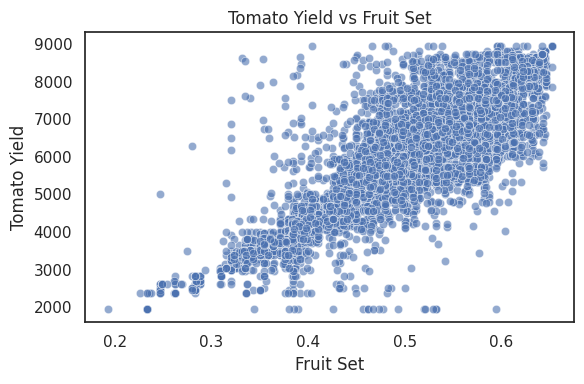

<ipython-input-28-808f5d1ef21f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Proportion of Rainy Days"], y=df["tomato_yield"], palette="coolwarm")


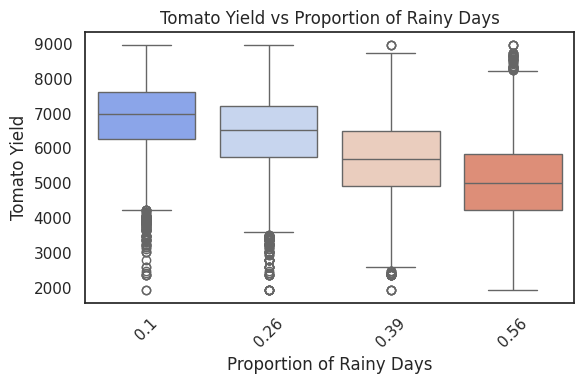

<ipython-input-28-808f5d1ef21f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Bee_1 Pollination Activity"], y=df["tomato_yield"], palette="coolwarm")


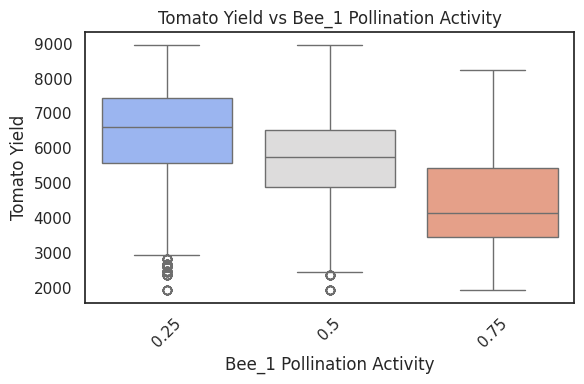

<ipython-input-28-808f5d1ef21f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
<ipython-input-28-808f5d1ef21f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
<ipython-input-28-808f5d1ef21f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")


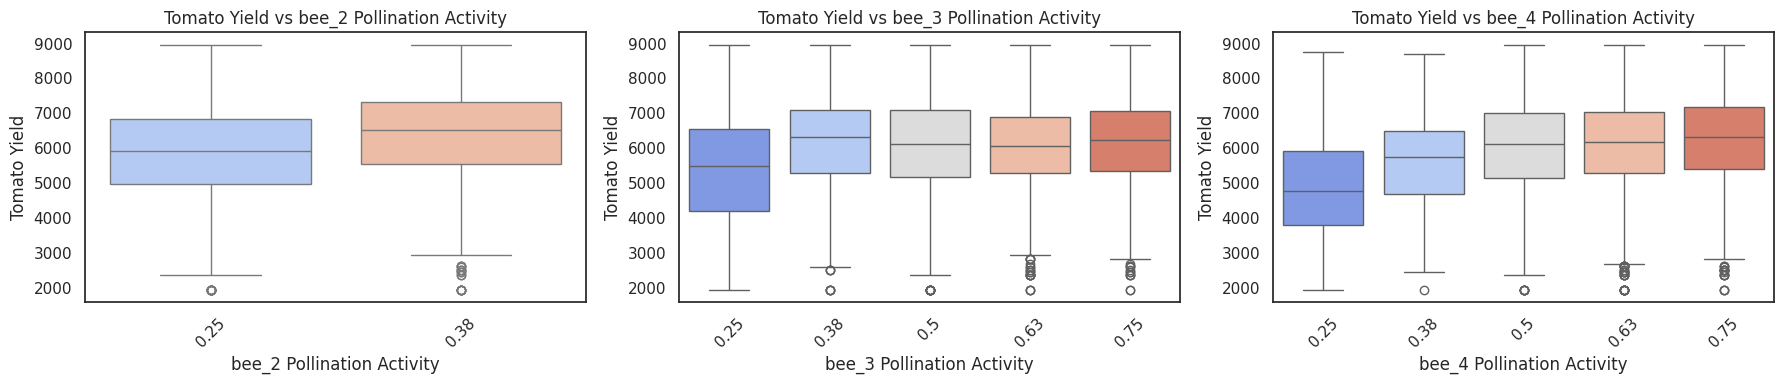

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["fruit_set"], y=df["tomato_yield"], alpha=0.6)
plt.title("Tomato Yield vs Fruit Set")
plt.xlabel("Fruit Set")
plt.ylabel("Tomato Yield")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Proportion of Rainy Days"], y=df["tomato_yield"], palette="coolwarm")
plt.title("Tomato Yield vs Proportion of Rainy Days")
plt.xlabel("Proportion of Rainy Days")
plt.ylabel("Tomato Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Bee_1 Pollination Activity"], y=df["tomato_yield"], palette="coolwarm")
plt.title("Tomato Yield vs Bee_1 Pollination Activity")
plt.xlabel("Bee_1 Pollination Activity")
plt.ylabel("Tomato Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bee_cols = ["bee_2 Pollination Activity", "bee_3 Pollination Activity", "bee_4 Pollination Activity"]
plt.figure(figsize=(18, 4))
for i, col in enumerate(bee_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df["tomato_yield"], palette="coolwarm")
    plt.title(f"Tomato Yield vs {col}")
    plt.xlabel(col)
    plt.ylabel("Tomato Yield")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Conclusions:

The data demonstrates the biological relationships between bee type, plant's size and pollination activity under different environmental conditions.

Fruit set shows the strongest correlation with tomato yield. We observed that an increase in fruit set has an almost perfect linear relationship with an increase in tomato yield. That makes biological sense since once the fruit sets there is a very high percentage for it to become the final fruit.

There is also a noticeable correlation between a decrease in rainy days and an increase in tomato yield, which suggests two options: first, that tomatoes may thrive in relatively dry weather second and more biologicaly true, is that during rainy days bees do not fly and pollination activity would be zero or minimal. The Pearson correlation coefficient between these variables is approximately -0.5, indicating a somewhat linear relationship, though not a very strong one.

The data indicates that as bee_1 activity increases, tomato yield decreases. While this relationship may not be strongly linear - given the relatively low Pearson coefficient - it is clearly visible in the graphs.

In contrast, increased activity of bee_2, bee_3, and bee_4 is associated with a moderate increase in tomato yield. Again, although the Pearson coefficients are not very high, the trend is evident in the visualizations.



Thank you for the semester!

We learned a lot from doing this project and from the lectures! And it was very exciting to finally feel how we should work with data and not only in a theoritical manner. So we both believe it is a very important class and we really appriciate it.